🔧 1. Set Up Your Environment
🛰️ 2. Load and Prepare the EuroSAT Dataset
🧠 3. Define Network Architectures: 🔹 Underparameterized Model
🔸 Moderately Parameterized Model
Use something like a custom medium CNN with more channels or ResNet-18.

🔺 Overparameterized Model
Make a deeper or wider CNN (or use ResNet-34/50).
🧪 4. Train and Compare Models
Train each model using the same training loop and hyperparameters.

Track:

Training loss & accuracy

Validation loss & accuracy

Convergence speed (epochs to 95% train acc)

Final test performance

Optional: Log results using matplotlib or TensorBoard.
📊 5. Analyze Optimization Behavior
Plot loss vs epochs and accuracy vs epochs.

Compare performance of:

SGD

Adam

SGD with momentum

🔍 6. Analyze Generalization & Implicit Regularization
Compare train/test gap across networks.

Observe if larger networks generalize better.

Optionally visualize filters or intermediate activations.
✂️ 7. Pruning and Compression (Bonus)
Use PyTorch’s pruning tools to:

Prune weights from the overparameterized model.

Evaluate how much the network can be compressed while maintaining accuracy.
📌 Final Tip: Keep a Journal
Document:

Model architecture summary

Epochs required for convergence

Performance metrics

Observations for each model

The models: underparameterized, moderate, or overparameterized are differentiated in terms of the number of trainable parameters .

SmallNet Parameters
self.conv1 = nn.Conv2d(3, 8, kernel_size=3)
Formula: out_channels * (in_channels * kernel_height * kernel_width + 1)

Conv1: 8 * (3 * 3 * 3 + 1) = 8 * (27 + 1) = 8 * 28 = 224

python
Copy
Edit
self.fc1 = nn.Linear(8 * 62 * 62, 10)
Input size = 8 * 62 * 62 = 30,752

Linear layer: 10 * (30,752 + 1) = 10 * 30,753 = **307,530**

🔸Total for SmallNet ≈ 224 + 307,530 = ~307,754 parameters

MediumNet Parameters
python
Copy
Edit
self.conv1 = nn.Conv2d(3, 16, kernel_size=3)  # 16 * (3*3*3 + 1) = 16 * 28 = 448
self.conv2 = nn.Conv2d(16, 32, kernel_size=3) # 32 * (16*3*3 + 1) = 32 * 145 = 4640
So:

Conv1: 448

Conv2: 4,640

Now the output size after two conv + pool steps:

Input: 64×64 → Conv1 (3→16, 3x3) → 62×62 → MaxPool(2x2) → 31×31

Conv2 → 29×29 → MaxPool(2x2) → 14×14

So 32 * 14 * 14 = 6272 inputs to the first FC layer.


self.fc1 = nn.Linear(6272, 128)    # (6272 + 1) * 128 = 802,944
self.fc2 = nn.Linear(128, 10)      # (128 + 1) * 10 = 1290

🔸Total for MediumNet ≈ 448 + 4640 + 802,944 + 1290 = ~809,322 parameters

Overparameterized Network (LargeNet) and compute its total number of trainable parameters:
🔸 Convolutional Layers
conv1 = nn.Conv2d(3, 64, kernel_size=3)
Params = 64 × (3×3×3 + 1) = 64 × 28 = 1,792

conv2 = nn.Conv2d(64, 128, kernel_size=3)
Params = 128 × (64×3×3 + 1) = 128 × 577 = 73,856

conv3 = nn.Conv2d(128, 256, kernel_size=3)
Params = 256 × (128×3×3 + 1) = 256 × 1,153 = 295,168

Total Conv Params: ~370,816

🔸 Fully Connected Layers
After conv3 and pooling, output size = (256, 6, 6) → 256 × 6 × 6 = 9,216

fc1 = nn.Linear(9216, 512)
Params = (9216 + 1) × 512 = 4,718,592

fc2 = nn.Linear(512, 128)
Params = (512 + 1) × 128 = 65,664

fc3 = nn.Linear(128, 10)
Params = (128 + 1) × 10 = 1,290

Total FC Params: ~4,785,546




In [ ]:
pip install torch torchvision matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
pip install seaborn


Eurosat Dataset Loading

In [ ]:
#Add this
from torchvision.datasets import EuroSAT
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

dataset = EuroSAT(root='./data', download=True, transform=transform)
class_names = dataset.classes

100%|██████████| 94.3M/94.3M [00:00<00:00, 238MB/s]


Split into train, validation and testing (70,15,15)

In [ ]:
#Add this
from torch.utils.data import random_split

total_size = len(dataset)  # should be 27,000
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # to avoid rounding issues

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])
print(len(train_set), len(val_set), len(test_set))


18900 4050 4050


Wrap into dataloaders

In [ ]:
#Add this
from torch.utils.data import DataLoader
#Load validation and test data without shuffling, so results are consistent across runs.
#train_loader: Loads data from train_set, shuffling it each epoch to avoid learning order-specific patterns.
batch_size = 64

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


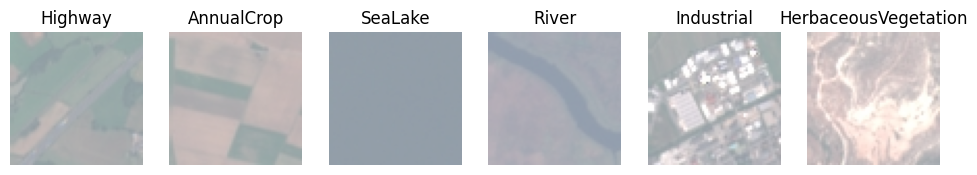

In [ ]:
#Add this
# 4. Data Visualization
# ===============================
import matplotlib.pyplot as plt # Import matplotlib

def show_samples(loader, classes, n=6):
    imgs, labs = next(iter(loader))
    fig, axs = plt.subplots(1, n, figsize=(12,3))
    for i in range(n):
        img = imgs[i].permute(1,2,0).numpy()
        img = (img*0.5)+0.5
        axs[i].imshow(img)
        axs[i].set_title(classes[labs[i].item()])
        axs[i].axis('off')
    plt.show()

print("Classes:", dataset.classes)
show_samples(train_loader, dataset.classes)

Network Architectures
Underparameterized Model

In [ ]:
import torch.nn as nn

In [ ]:
#Add this
# Underparameterized Network (very shallow/small)
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3) #Takes a 3-channel input (RGB image), Outputs 8 feature maps. single convolutional layer.

        self.fc1 = nn.Linear(8 * 62 * 62, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        return self.fc1(x)

# Moderate-sized Network
class MediumNet(nn.Module):
    def __init__(self):
        super(MediumNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3) #Two convolutional layers:


        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 30 * 30, 128) #Linear(32 * 30 * 30, 128) flattens and maps to 128 hidden units.


        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

Overparameterized Network (very deep or wide)


In [ ]:
#Add this
# Overparameterized Network (very deep or wide)
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 6 * 6, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


🔁 Training, Validation, and Testing Loop

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
# Choose your model
model = LargeNet()  # change to SmallNet() or MediumNet() as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

# Test accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"\nTest Accuracy: {correct / total:.4f}")


Epoch 1/10:   0%|          | 0/296 [00:00<?, ?it/s]

In [ ]:
class MediumNet(nn.Module):
    def __init__(self):
        super(MediumNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)     # Output: 16 x 62 x 62
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)    # Output: 32 x 29 x 29
        self.pool = nn.MaxPool2d(2, 2)                   # After 2 pools: 32 x 14 x 14
        self.fc1 = nn.Linear(32 * 14 * 14, 128)          # Corrected input size
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # -> 16 x 31 x 31
        x = self.pool(F.relu(self.conv2(x)))  # -> 32 x 14 x 14
        x = x.view(x.size(0), -1)             # -> flatten
        x = F.relu(self.fc1(x))
        return self.fc2(x)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# Define the networks
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3)
        self.fc1 = nn.Linear(8 * 62 * 62, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        return self.fc1(x)

class MediumNet(nn.Module):
    def __init__(self):
        super(MediumNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 30 * 30, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 6 * 6, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Replace with your actual DataLoader
# train_loader, val_loader, test_loader must be defined before running this

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models = [("SmallNet", SmallNet()), ("MediumNet", MediumNet()), ("LargeNet", LargeNet())]
num_epochs = 10
learning_rate = 0.001

for name, model in models:
    print(f"\n\n=== Training {name} ===")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"[{name}] Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation accuracy
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_acc = correct / total
        val_accuracies.append(val_acc)

        print(f"[{name}] Epoch {epoch+1} | Train Loss: {train_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    # Test accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    test_accuracy = correct / total
    print(f"\n[{name}] Final Test Accuracy: {test_accuracy:.4f}")




=== Training SmallNet ===


[SmallNet] Epoch 1/10: 100%|██████████| 296/296 [00:17<00:00, 16.66it/s]


[SmallNet] Epoch 1 | Train Loss: 1.6055 | Val Accuracy: 0.5437


[SmallNet] Epoch 2/10: 100%|██████████| 296/296 [00:18<00:00, 16.05it/s]


[SmallNet] Epoch 2 | Train Loss: 1.2842 | Val Accuracy: 0.5770


[SmallNet] Epoch 3/10: 100%|██████████| 296/296 [00:17<00:00, 16.79it/s]


[SmallNet] Epoch 3 | Train Loss: 1.0604 | Val Accuracy: 0.6395


[SmallNet] Epoch 4/10: 100%|██████████| 296/296 [00:17<00:00, 16.56it/s]


[SmallNet] Epoch 4 | Train Loss: 0.9335 | Val Accuracy: 0.6249


[SmallNet] Epoch 5/10: 100%|██████████| 296/296 [00:18<00:00, 16.13it/s]


[SmallNet] Epoch 5 | Train Loss: 0.8841 | Val Accuracy: 0.6602


[SmallNet] Epoch 6/10: 100%|██████████| 296/296 [00:17<00:00, 16.57it/s]


[SmallNet] Epoch 6 | Train Loss: 0.8289 | Val Accuracy: 0.6449


[SmallNet] Epoch 7/10: 100%|██████████| 296/296 [00:22<00:00, 13.04it/s]


[SmallNet] Epoch 7 | Train Loss: 0.7909 | Val Accuracy: 0.6753


[SmallNet] Epoch 8/10: 100%|██████████| 296/296 [00:18<00:00, 16.41it/s]


[SmallNet] Epoch 8 | Train Loss: 0.7736 | Val Accuracy: 0.6630


[SmallNet] Epoch 9/10: 100%|██████████| 296/296 [00:18<00:00, 15.87it/s]


[SmallNet] Epoch 9 | Train Loss: 0.7335 | Val Accuracy: 0.6726


[SmallNet] Epoch 10/10: 100%|██████████| 296/296 [00:17<00:00, 16.67it/s]


[SmallNet] Epoch 10 | Train Loss: 0.7134 | Val Accuracy: 0.7074

[SmallNet] Final Test Accuracy: 0.7027


=== Training MediumNet ===


[MediumNet] Epoch 1/10:   0%|          | 0/296 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x6272 and 28800x128)

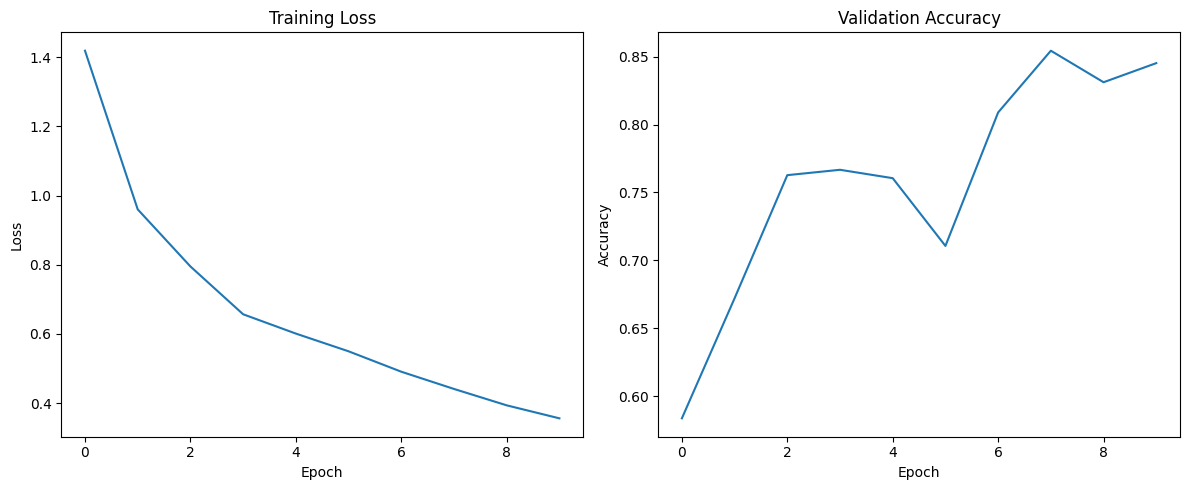

In [ ]:
# Plot training loss and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


SmallNet - Epoch 1: Val Acc = 0.3381
SmallNet - Epoch 2: Val Acc = 0.3600
SmallNet - Epoch 3: Val Acc = 0.3819
SmallNet - Epoch 4: Val Acc = 0.4004
SmallNet - Epoch 5: Val Acc = 0.4370
SmallNet - Epoch 6: Val Acc = 0.4370
SmallNet - Epoch 7: Val Acc = 0.4037
SmallNet - Epoch 8: Val Acc = 0.4467
SmallNet - Epoch 9: Val Acc = 0.4107
SmallNet - Epoch 10: Val Acc = 0.4330
SmallNet - Test Accuracy: 0.4144
MediumNet - Epoch 1: Val Acc = 0.4004
MediumNet - Epoch 2: Val Acc = 0.3978
MediumNet - Epoch 3: Val Acc = 0.4589
MediumNet - Epoch 4: Val Acc = 0.4930
MediumNet - Epoch 5: Val Acc = 0.4819
MediumNet - Epoch 6: Val Acc = 0.4685
MediumNet - Epoch 7: Val Acc = 0.4974
MediumNet - Epoch 8: Val Acc = 0.5070
MediumNet - Epoch 9: Val Acc = 0.5030
MediumNet - Epoch 10: Val Acc = 0.5026
MediumNet - Test Accuracy: 0.5019
LargeNet - Epoch 1: Val Acc = 0.4148
LargeNet - Epoch 2: Val Acc = 0.4107
LargeNet - Epoch 3: Val Acc = 0.4578
LargeNet - Epoch 4: Val Acc = 0.4863
LargeNet - Epoch 5: Val Acc = 0.4

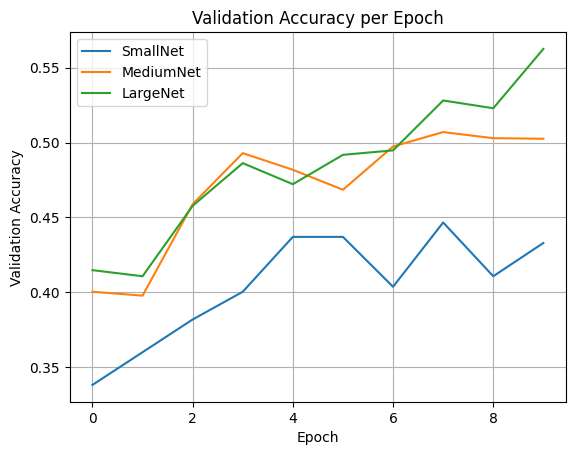

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load EuroSAT Dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.EuroSAT(
    root='./data', download=True, transform=transform
)

# Split data
train_size = int(0.8 * len(train_dataset))
val_size = int(0.1 * len(train_dataset))
test_size = len(train_dataset) - train_size - val_size
train_set, val_set, test_set = torch.utils.data.random_split(train_dataset, [train_size, val_size, test_size])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Define different model sizes
class SmallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64*3, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x): return self.model(x)

class MediumNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64*3, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x): return self.model(x)

class LargeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64*3, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x): return self.model(x)

# Train & Evaluate Function
def train_and_evaluate(model_class, name):
    model = model_class().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    train_losses, val_accuracies = [], []

    for epoch in range(10):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()

        model.eval()
        val_preds, val_targets = [], []
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                preds = model(x).argmax(dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_targets.extend(y.cpu().numpy())

        acc = accuracy_score(val_targets, val_preds)
        val_accuracies.append(acc)
        print(f"{name} - Epoch {epoch+1}: Val Acc = {acc:.4f}")

    # Final Test Accuracy
    test_preds, test_targets = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(dim=1)
            test_preds.extend(preds.cpu().numpy())
            test_targets.extend(y.cpu().numpy())
    test_acc = accuracy_score(test_targets, test_preds)
    print(f"{name} - Test Accuracy: {test_acc:.4f}")
    return val_accuracies

# Run All
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
acc_small = train_and_evaluate(SmallNet, "SmallNet")
acc_medium = train_and_evaluate(MediumNet, "MediumNet")
acc_large = train_and_evaluate(LargeNet, "LargeNet")

# Plot
plt.plot(acc_small, label='SmallNet')
plt.plot(acc_medium, label='MediumNet')
plt.plot(acc_large, label='LargeNet')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy per Epoch')
plt.grid(True)
plt.show()

In [ ]:
# Defining optimizers
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

extra_optimizers = {
    'SGD_Momentum': lambda params: optim.SGD(params, lr=0.001, momentum=0.9),
    'RMSProp': lambda params: optim.RMSprop(params, lr=0.001)
}

# Define model sizes (same as before)
model_variants = {
    "Small": SmallNet,
    "Mid": MediumNet,
    "Large": LargeNet
}

results = {}

# Define the train_model function:
def train_model(model, optimizer, train_loader, val_loader, num_epochs, criterion, device, verbose=True):
    history = {'train_loss': [], 'val_loss': []}  # Store losses

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

        train_loss /= len(train_loader.dataset)
        history['train_loss'].append(train_loss)

        # Validation loss
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)

        val_loss /= len(val_loader.dataset)
        history['val_loss'].append(val_loss)

        if verbose:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return history


for opt_name, opt_func in extra_optimizers.items():
    for model_name, model_class in model_variants.items():
        print(f"Training {model_name} with {opt_name}")
        model = model_class().to(device)
        optimizer = opt_func(model.parameters())

        # call the defined train_model function
        history = train_model(
            model=model,
            optimizer=optimizer,
            train_loader=train_loader,
            val_loader=val_loader,
            num_epochs=10,
            criterion=nn.CrossEntropyLoss(),  # Assuming criterion is defined elsewhere
            device=device,
            verbose=True
        )

        results[f"{model_name}_{opt_name}"] = history


Training Small with SGD_Momentum


Epoch 1/10: 100%|██████████| 338/338 [00:14<00:00, 22.91it/s]


Epoch 1/10, Train Loss: 2.1027, Validation Loss: 1.8764


Epoch 2/10: 100%|██████████| 338/338 [00:16<00:00, 20.00it/s]


Epoch 2/10, Train Loss: 1.8060, Validation Loss: 1.7412


Epoch 3/10: 100%|██████████| 338/338 [00:16<00:00, 20.82it/s]


Epoch 3/10, Train Loss: 1.7235, Validation Loss: 1.6924


Epoch 4/10: 100%|██████████| 338/338 [00:16<00:00, 20.77it/s]


Epoch 4/10, Train Loss: 1.6824, Validation Loss: 1.6478


Epoch 5/10: 100%|██████████| 338/338 [00:17<00:00, 19.77it/s]


Epoch 5/10, Train Loss: 1.6497, Validation Loss: 1.6098


Epoch 6/10: 100%|██████████| 338/338 [00:16<00:00, 20.47it/s]


Epoch 6/10, Train Loss: 1.6213, Validation Loss: 1.5968


Epoch 7/10: 100%|██████████| 338/338 [00:16<00:00, 19.94it/s]


Epoch 7/10, Train Loss: 1.6039, Validation Loss: 1.5808


Epoch 8/10: 100%|██████████| 338/338 [00:16<00:00, 20.33it/s]


Epoch 8/10, Train Loss: 1.5811, Validation Loss: 1.5733


Epoch 9/10: 100%|██████████| 338/338 [00:17<00:00, 19.61it/s]


Epoch 9/10, Train Loss: 1.5580, Validation Loss: 1.5375


Epoch 10/10: 100%|██████████| 338/338 [00:16<00:00, 20.11it/s]


Epoch 10/10, Train Loss: 1.5440, Validation Loss: 1.5223
Training Mid with SGD_Momentum


Epoch 1/10: 100%|██████████| 338/338 [00:31<00:00, 10.74it/s]


Epoch 1/10, Train Loss: 2.1170, Validation Loss: 1.8856


Epoch 2/10: 100%|██████████| 338/338 [00:30<00:00, 11.23it/s]


Epoch 2/10, Train Loss: 1.8034, Validation Loss: 1.7672


Epoch 3/10: 100%|██████████| 338/338 [00:32<00:00, 10.56it/s]


Epoch 3/10, Train Loss: 1.7296, Validation Loss: 1.6751


Epoch 4/10: 100%|██████████| 338/338 [00:31<00:00, 10.56it/s]


Epoch 4/10, Train Loss: 1.6797, Validation Loss: 1.6729


Epoch 5/10: 100%|██████████| 338/338 [00:30<00:00, 10.96it/s]


Epoch 5/10, Train Loss: 1.6385, Validation Loss: 1.5925


Epoch 6/10: 100%|██████████| 338/338 [00:30<00:00, 11.18it/s]


Epoch 6/10, Train Loss: 1.5955, Validation Loss: 1.5517


Epoch 7/10: 100%|██████████| 338/338 [00:30<00:00, 11.17it/s]


Epoch 7/10, Train Loss: 1.5525, Validation Loss: 1.5388


Epoch 8/10: 100%|██████████| 338/338 [00:31<00:00, 10.61it/s]


Epoch 8/10, Train Loss: 1.5185, Validation Loss: 1.4826


Epoch 9/10: 100%|██████████| 338/338 [00:30<00:00, 11.09it/s]


Epoch 9/10, Train Loss: 1.4917, Validation Loss: 1.4806


Epoch 10/10: 100%|██████████| 338/338 [00:30<00:00, 10.92it/s]


Epoch 10/10, Train Loss: 1.4712, Validation Loss: 1.4658
Training Large with SGD_Momentum


Epoch 1/10: 100%|██████████| 338/338 [01:53<00:00,  2.98it/s]


Epoch 1/10, Train Loss: 2.2331, Validation Loss: 2.1265


Epoch 2/10: 100%|██████████| 338/338 [01:54<00:00,  2.94it/s]


Epoch 2/10, Train Loss: 1.9318, Validation Loss: 1.7851


Epoch 3/10: 100%|██████████| 338/338 [01:56<00:00,  2.91it/s]


Epoch 3/10, Train Loss: 1.7769, Validation Loss: 1.7371


Epoch 4/10: 100%|██████████| 338/338 [01:57<00:00,  2.87it/s]


Epoch 4/10, Train Loss: 1.7294, Validation Loss: 1.6850


Epoch 5/10: 100%|██████████| 338/338 [02:00<00:00,  2.81it/s]


Epoch 5/10, Train Loss: 1.6805, Validation Loss: 1.6400


Epoch 6/10: 100%|██████████| 338/338 [02:02<00:00,  2.76it/s]


Epoch 6/10, Train Loss: 1.6416, Validation Loss: 1.6219


Epoch 7/10: 100%|██████████| 338/338 [02:00<00:00,  2.80it/s]


Epoch 7/10, Train Loss: 1.6111, Validation Loss: 1.5808


Epoch 8/10: 100%|██████████| 338/338 [01:59<00:00,  2.83it/s]


Epoch 8/10, Train Loss: 1.5787, Validation Loss: 1.5694


Epoch 9/10: 100%|██████████| 338/338 [01:59<00:00,  2.83it/s]


Epoch 9/10, Train Loss: 1.5427, Validation Loss: 1.5198


Epoch 10/10: 100%|██████████| 338/338 [01:59<00:00,  2.82it/s]


Epoch 10/10, Train Loss: 1.5125, Validation Loss: 1.4976
Training Small with RMSProp


Epoch 1/10: 100%|██████████| 338/338 [00:15<00:00, 21.94it/s]


Epoch 1/10, Train Loss: 2.5199, Validation Loss: 1.8970


Epoch 2/10: 100%|██████████| 338/338 [00:15<00:00, 22.18it/s]


Epoch 2/10, Train Loss: 1.8158, Validation Loss: 1.7159


Epoch 3/10: 100%|██████████| 338/338 [00:15<00:00, 21.73it/s]


Epoch 3/10, Train Loss: 1.7524, Validation Loss: 1.7146


Epoch 4/10: 100%|██████████| 338/338 [00:15<00:00, 22.22it/s]


Epoch 4/10, Train Loss: 1.7159, Validation Loss: 1.6900


Epoch 5/10: 100%|██████████| 338/338 [00:15<00:00, 22.09it/s]


Epoch 5/10, Train Loss: 1.6952, Validation Loss: 1.6865


Epoch 6/10: 100%|██████████| 338/338 [00:16<00:00, 20.48it/s]


Epoch 6/10, Train Loss: 1.6819, Validation Loss: 1.7204


Epoch 7/10: 100%|██████████| 338/338 [00:15<00:00, 22.02it/s]


Epoch 7/10, Train Loss: 1.6735, Validation Loss: 1.6824


Epoch 8/10: 100%|██████████| 338/338 [00:15<00:00, 21.23it/s]


Epoch 8/10, Train Loss: 1.6689, Validation Loss: 1.8641


Epoch 9/10: 100%|██████████| 338/338 [00:15<00:00, 21.81it/s]


Epoch 9/10, Train Loss: 1.6598, Validation Loss: 1.6247


Epoch 10/10: 100%|██████████| 338/338 [00:15<00:00, 22.16it/s]


Epoch 10/10, Train Loss: 1.6561, Validation Loss: 1.6771
Training Mid with RMSProp


Epoch 1/10: 100%|██████████| 338/338 [00:38<00:00,  8.83it/s]


Epoch 1/10, Train Loss: 2.2778, Validation Loss: 2.0240


Epoch 2/10: 100%|██████████| 338/338 [00:36<00:00,  9.18it/s]


Epoch 2/10, Train Loss: 1.7258, Validation Loss: 1.7683


Epoch 3/10: 100%|██████████| 338/338 [00:35<00:00,  9.61it/s]


Epoch 3/10, Train Loss: 1.6515, Validation Loss: 1.6863


Epoch 4/10: 100%|██████████| 338/338 [00:35<00:00,  9.55it/s]


Epoch 4/10, Train Loss: 1.5792, Validation Loss: 1.6956


Epoch 5/10: 100%|██████████| 338/338 [00:36<00:00,  9.38it/s]


Epoch 5/10, Train Loss: 1.5280, Validation Loss: 1.5073


Epoch 6/10: 100%|██████████| 338/338 [00:35<00:00,  9.50it/s]


Epoch 6/10, Train Loss: 1.4969, Validation Loss: 1.4442


Epoch 7/10: 100%|██████████| 338/338 [00:36<00:00,  9.26it/s]


Epoch 7/10, Train Loss: 1.4698, Validation Loss: 1.4857


Epoch 8/10: 100%|██████████| 338/338 [00:41<00:00,  8.11it/s]


Epoch 8/10, Train Loss: 1.4381, Validation Loss: 1.4388


Epoch 9/10: 100%|██████████| 338/338 [00:38<00:00,  8.73it/s]


Epoch 9/10, Train Loss: 1.4242, Validation Loss: 1.4719


Epoch 10/10: 100%|██████████| 338/338 [00:37<00:00,  9.10it/s]


Epoch 10/10, Train Loss: 1.4031, Validation Loss: 1.3362
Training Large with RMSProp


Epoch 1/10: 100%|██████████| 338/338 [02:47<00:00,  2.02it/s]


Epoch 1/10, Train Loss: 5.1878, Validation Loss: 1.7801


Epoch 2/10: 100%|██████████| 338/338 [02:46<00:00,  2.03it/s]


Epoch 2/10, Train Loss: 1.7491, Validation Loss: 1.8925


Epoch 3/10: 100%|██████████| 338/338 [02:40<00:00,  2.10it/s]


Epoch 3/10, Train Loss: 1.6536, Validation Loss: 1.7436


Epoch 4/10: 100%|██████████| 338/338 [02:41<00:00,  2.09it/s]


Epoch 4/10, Train Loss: 1.5762, Validation Loss: 1.5394


Epoch 5/10: 100%|██████████| 338/338 [02:41<00:00,  2.09it/s]


Epoch 5/10, Train Loss: 1.5340, Validation Loss: 1.4668


Epoch 6/10: 100%|██████████| 338/338 [02:42<00:00,  2.08it/s]


Epoch 6/10, Train Loss: 1.4851, Validation Loss: 1.4421


Epoch 7/10: 100%|██████████| 338/338 [02:48<00:00,  2.01it/s]


Epoch 7/10, Train Loss: 1.4439, Validation Loss: 1.4988


Epoch 8/10: 100%|██████████| 338/338 [02:46<00:00,  2.04it/s]


Epoch 8/10, Train Loss: 1.4032, Validation Loss: 1.4560


Epoch 9/10: 100%|██████████| 338/338 [02:44<00:00,  2.06it/s]


Epoch 9/10, Train Loss: 1.3808, Validation Loss: 1.3455


Epoch 10/10: 100%|██████████| 338/338 [02:44<00:00,  2.06it/s]


Epoch 10/10, Train Loss: 1.3494, Validation Loss: 1.4425


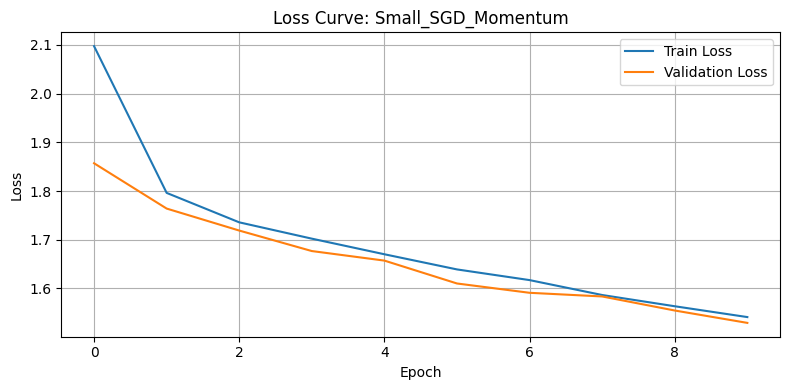

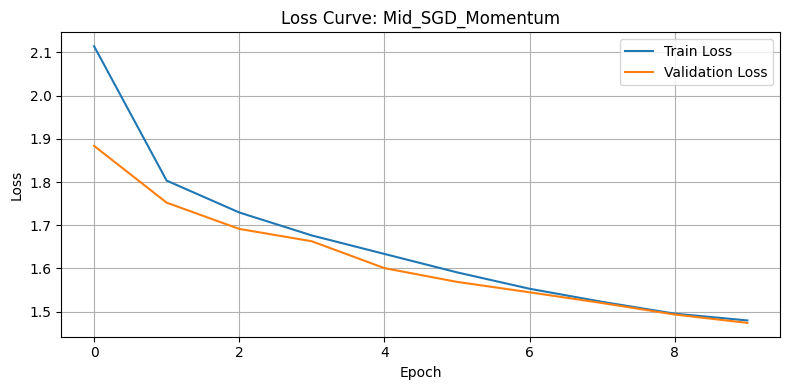

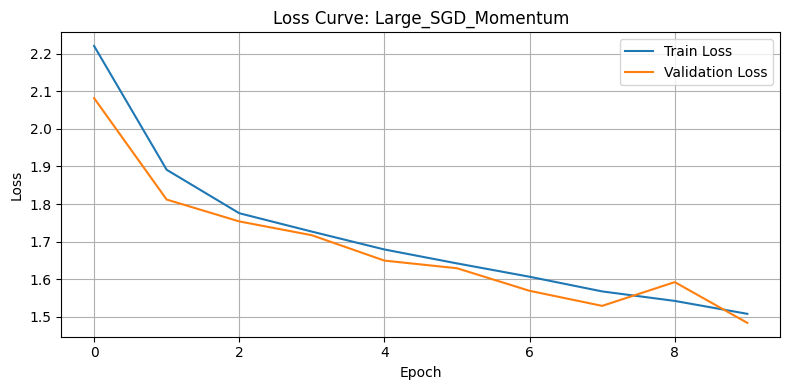

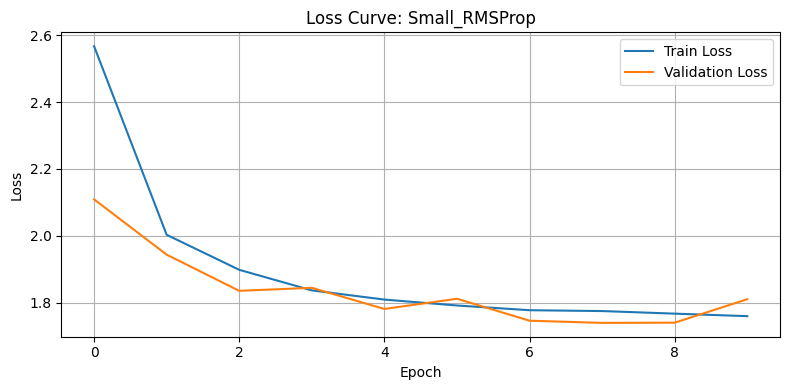

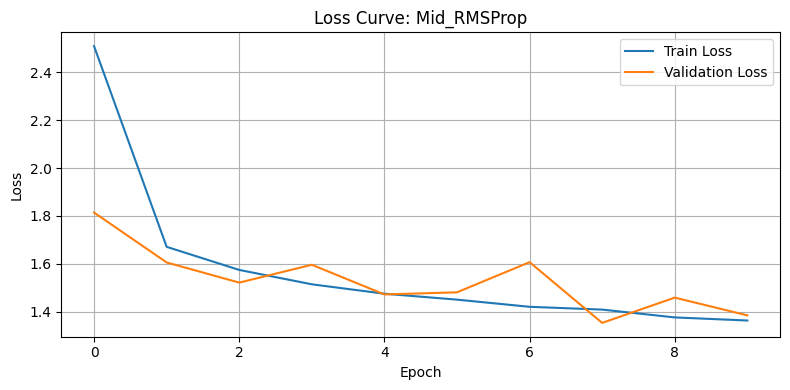

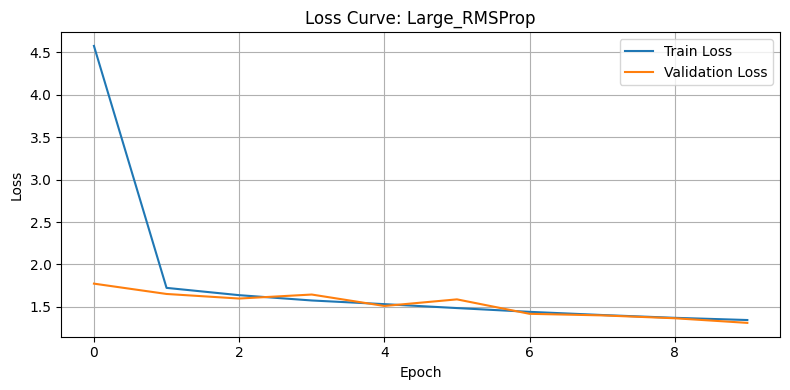

In [ ]:
 # Plot Training and Validation Loss
for key, history in results.items():
    train_losses, val_losses = history['train_loss'], history['val_loss']
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f"Loss Curve: {key}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

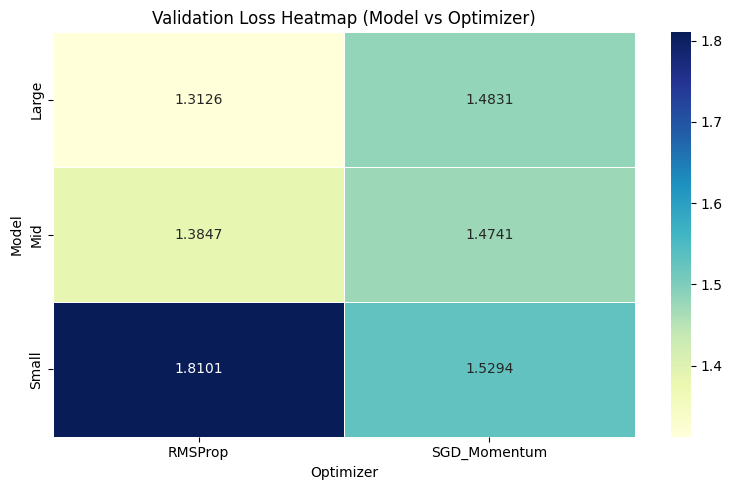

In [ ]:
# ------------------------
# Heatmap: Final Validation Loss by Model & Optimizer
# ------------------------

# Split model and optimizer into separate columns
# Split model and optimizer into separate columns, handling extra underscores
results_df[['Model', 'Optimizer']] = results_df['Model_Optimizer'].str.split('_', n=1, expand=True)
# n=1 to split only on the first underscore

# Ensure Optimizer column is filled with something in case of no underscores
results_df['Optimizer'] = results_df['Optimizer'].fillna('Unknown') # fill NaNs (no splits)

# Pivot the table to form a matrix for heatmap
heatmap_data = results_df.pivot(index='Model', columns='Optimizer', values='Final_Validation_Loss')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=0.5)
plt.title("Validation Loss Heatmap (Model vs Optimizer)")
plt.ylabel("Model")
plt.xlabel("Optimizer")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

summary_rows = []
for key, history in results.items():
    train_final = history['train_loss'][-1]
    val_final = history['val_loss'][-1]
    summary_rows.append({
        'Model_Optimizer': key,
        'Final_Train_Loss': round(train_final, 4),
        'Final_Validation_Loss': round(val_final, 4)
    })

results_df = pd.DataFrame(summary_rows)
display(results_df.sort_values(by='Final_Validation_Loss'))


,Model_Optimizer,Final_Train_Loss,Final_Validation_Loss
5,Large_RMSProp,1.3462,1.3126
4,Mid_RMSProp,1.3631,1.3847
1,Mid_SGD_Momentum,1.4797,1.4741
2,Large_SGD_Momentum,1.5072,1.4831
0,Small_SGD_Momentum,1.5413,1.5294
3,Small_RMSProp,1.7593,1.8101


<ipython-input-38-ddd8e69d6a42>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model_Optimizer', y='Final_Validation_Loss', palette='mako')


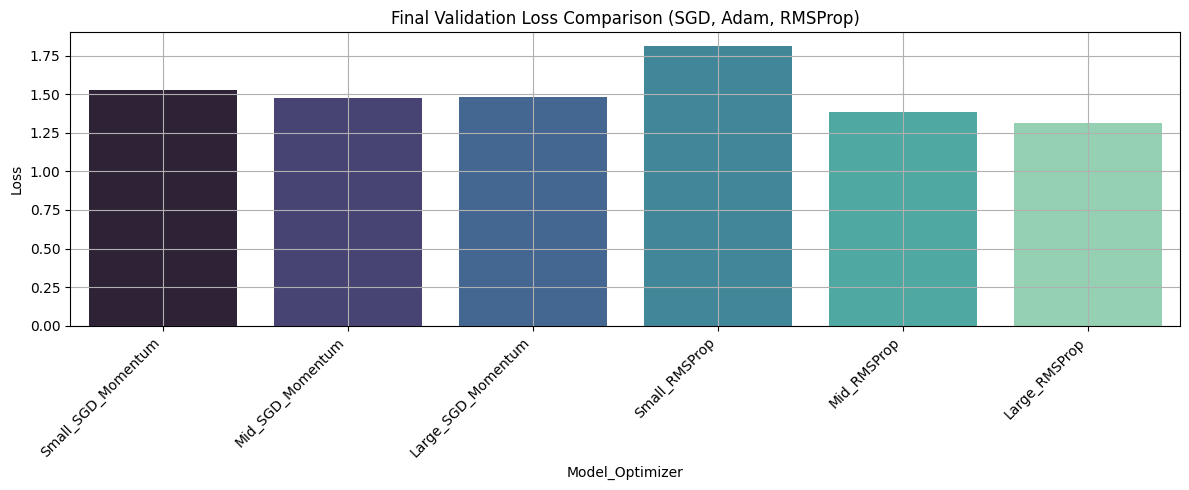

In [ ]:
# Bar Plot Comparison
# ------------------------

plt.figure(figsize=(12, 5))
sns.barplot(data=results_df, x='Model_Optimizer', y='Final_Validation_Loss', palette='mako')
plt.xticks(rotation=45, ha='right')
plt.title("Final Validation Loss Comparison (SGD, Adam, RMSProp)") #adam is not here so can be omitted
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

SGD - Epoch 1: Val Acc = 0.3126
SGD - Epoch 2: Val Acc = 0.4511
SGD - Epoch 3: Val Acc = 0.4330
SGD - Epoch 4: Val Acc = 0.4107
SGD - Epoch 5: Val Acc = 0.4844
SGD - Epoch 6: Val Acc = 0.4074
SGD - Epoch 7: Val Acc = 0.4715
SGD - Epoch 8: Val Acc = 0.4974
SGD - Epoch 9: Val Acc = 0.5037
SGD - Epoch 10: Val Acc = 0.4711
SGD - Test Accuracy: 0.5015
RMSprop - Epoch 1: Val Acc = 0.2441
RMSprop - Epoch 2: Val Acc = 0.3441
RMSprop - Epoch 3: Val Acc = 0.4574
RMSprop - Epoch 4: Val Acc = 0.4111
RMSprop - Epoch 5: Val Acc = 0.4322
RMSprop - Epoch 6: Val Acc = 0.4715
RMSprop - Epoch 7: Val Acc = 0.4722
RMSprop - Epoch 8: Val Acc = 0.4226
RMSprop - Epoch 9: Val Acc = 0.4789
RMSprop - Epoch 10: Val Acc = 0.5022
RMSprop - Test Accuracy: 0.5256


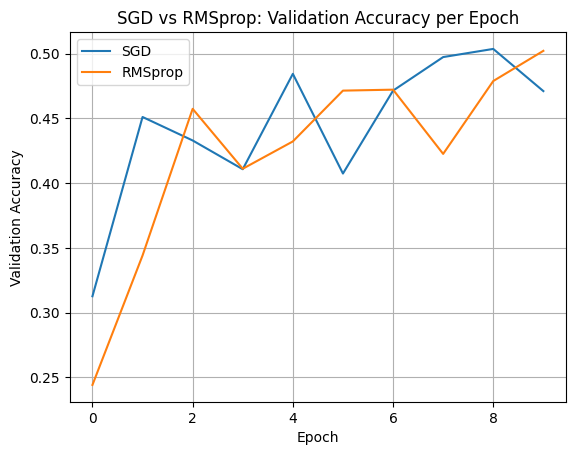

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
dataset = torchvision.datasets.EuroSAT(root='./data', download=True, transform=transform)

# Split
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Model
class MediumNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64*3, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x): return self.model(x)

# Train + Evaluate
def train_and_evaluate(optimizer_name):
    model = MediumNet().to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

    val_accuracies = []

    for epoch in range(10):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()

        model.eval()
        val_preds, val_targets = [], []
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                preds = model(x).argmax(dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_targets.extend(y.cpu().numpy())

        acc = accuracy_score(val_targets, val_preds)
        val_accuracies.append(acc)
        print(f"{optimizer_name} - Epoch {epoch+1}: Val Acc = {acc:.4f}")

    # Final Test Accuracy
    test_preds, test_targets = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(dim=1)
            test_preds.extend(preds.cpu().numpy())
            test_targets.extend(y.cpu().numpy())
    test_acc = accuracy_score(test_targets, test_preds)
    print(f"{optimizer_name} - Test Accuracy: {test_acc:.4f}")

    return val_accuracies

# Run for SGD and RMSprop
acc_sgd = train_and_evaluate('SGD')
acc_rmsprop = train_and_evaluate('RMSprop')

# Plot
plt.plot(acc_sgd, label='SGD')
plt.plot(acc_rmsprop, label='RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('SGD vs RMSprop: Validation Accuracy per Epoch')
plt.grid(True)
plt.show()



Training SmallNet with SGD
SmallNet (SGD) - Epoch 1: Val Acc = 0.2800
SmallNet (SGD) - Epoch 2: Val Acc = 0.3126
SmallNet (SGD) - Epoch 3: Val Acc = 0.2893
SmallNet (SGD) - Epoch 4: Val Acc = 0.2863
SmallNet (SGD) - Epoch 5: Val Acc = 0.3004
SmallNet (SGD) - Epoch 6: Val Acc = 0.2885
SmallNet (SGD) - Epoch 7: Val Acc = 0.2404
SmallNet (SGD) - Epoch 8: Val Acc = 0.3152
SmallNet (SGD) - Epoch 9: Val Acc = 0.3500
SmallNet (SGD) - Epoch 10: Val Acc = 0.3537
SmallNet (SGD) - Test Accuracy: 0.3630

Training SmallNet with RMSprop
SmallNet (RMSprop) - Epoch 1: Val Acc = 0.4678
SmallNet (RMSprop) - Epoch 2: Val Acc = 0.4656
SmallNet (RMSprop) - Epoch 3: Val Acc = 0.5185
SmallNet (RMSprop) - Epoch 4: Val Acc = 0.6185
SmallNet (RMSprop) - Epoch 5: Val Acc = 0.5259
SmallNet (RMSprop) - Epoch 6: Val Acc = 0.6226
SmallNet (RMSprop) - Epoch 7: Val Acc = 0.6504
SmallNet (RMSprop) - Epoch 8: Val Acc = 0.5048
SmallNet (RMSprop) - Epoch 9: Val Acc = 0.6496
SmallNet (RMSprop) - Epoch 10: Val Acc = 0.6152

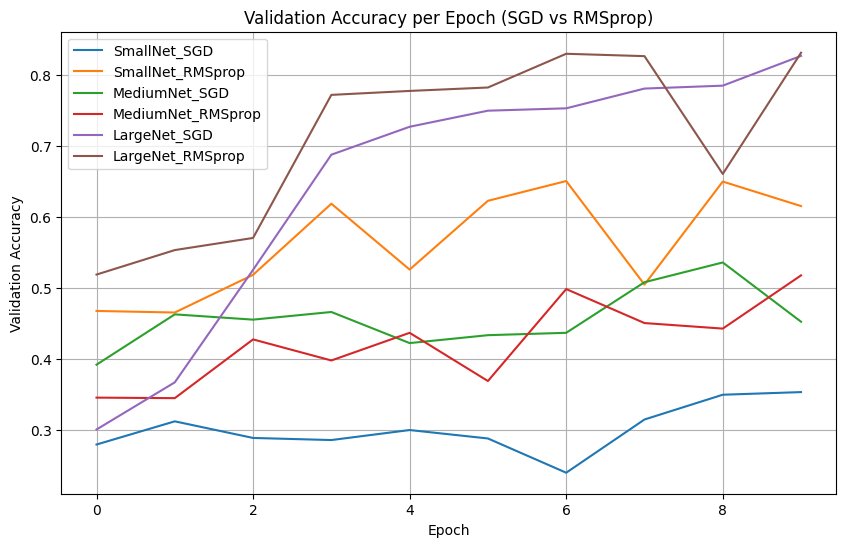


Summary of Final Accuracies:
     Model_Optimizer  Final_Validation_Accuracy  Test_Accuracy
4       LargeNet_SGD                     0.8263         0.8289
5   LargeNet_RMSprop                     0.8307         0.8226
1   SmallNet_RMSprop                     0.6152         0.5989
3  MediumNet_RMSprop                     0.5178         0.5367
2      MediumNet_SGD                     0.4526         0.4570
0       SmallNet_SGD                     0.3537         0.3630


<ipython-input-11-693d2e46c0cb>:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model_Optimizer', y='Test_Accuracy', palette='mako')


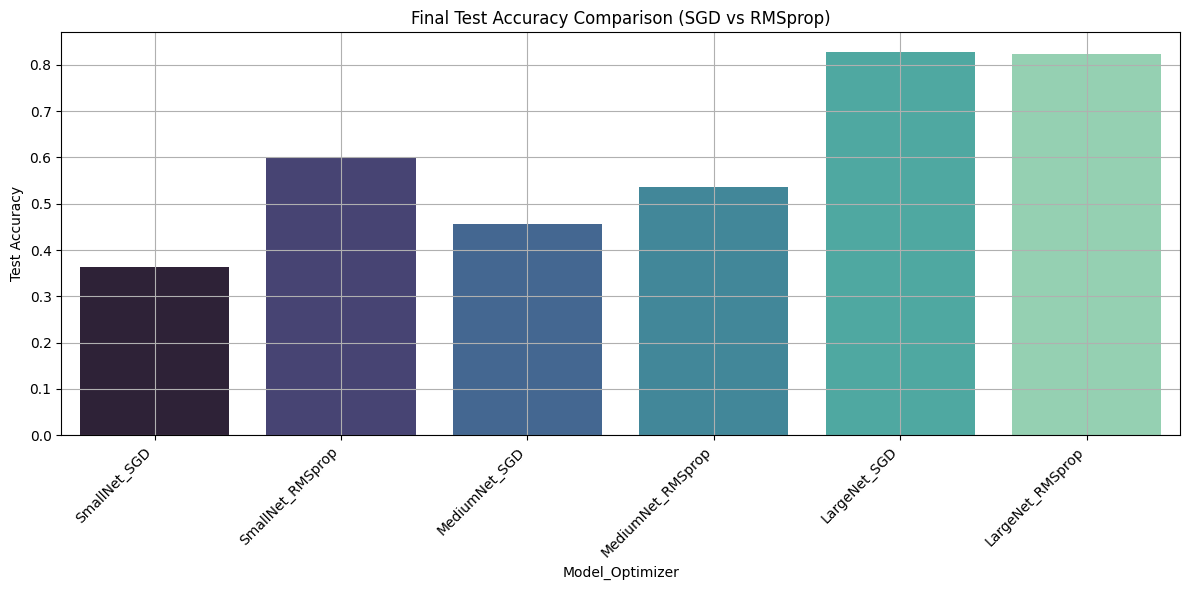

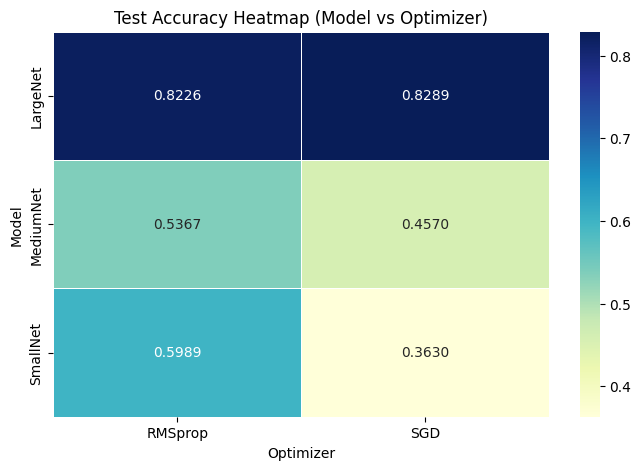

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])
dataset = torchvision.datasets.EuroSAT(root='./data', download=True, transform=transform)

# Split
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

# Model Definitions
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3)
        self.fc1 = nn.Linear(8 * 62 * 62, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        return self.fc1(x)

class MediumNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*64*3, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x): return self.model(x)

class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 6 * 6, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# Train + Evaluate
def train_and_evaluate(model_class, model_name, optimizer_name):
    model = model_class().to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

    val_accuracies = []

    for epoch in range(10):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()

        model.eval()
        val_preds, val_targets = [], []
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                preds = model(x).argmax(dim=1)
                val_preds.extend(preds.cpu().numpy())
                val_targets.extend(y.cpu().numpy())

        acc = accuracy_score(val_targets, val_preds)
        val_accuracies.append(acc)
        print(f"{model_name} ({optimizer_name}) - Epoch {epoch+1}: Val Acc = {acc:.4f}")

    # Final Test Accuracy
    test_preds, test_targets = [], []
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            preds = model(x).argmax(dim=1)
            test_preds.extend(preds.cpu().numpy())
            test_targets.extend(y.cpu().numpy())
    test_acc = accuracy_score(test_targets, test_preds)
    print(f"{model_name} ({optimizer_name}) - Test Accuracy: {test_acc:.4f}")

    return val_accuracies, test_acc

# Run for all models and optimizers
models = [
    (SmallNet, 'SmallNet'),
    (MediumNet, 'MediumNet'),
    (LargeNet, 'LargeNet')
]
optimizers = ['SGD', 'RMSprop']
results = {}

for model_class, model_name in models:
    for opt_name in optimizers:
        print(f"\nTraining {model_name} with {opt_name}")
        val_acc, test_acc = train_and_evaluate(model_class, model_name, opt_name)
        results[f"{model_name}_{opt_name}"] = {'val_accuracies': val_acc, 'test_accuracy': test_acc}

# Plot Validation Accuracy Curves
plt.figure(figsize=(10, 6))
for key, result in results.items():
    plt.plot(result['val_accuracies'], label=key)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy per Epoch (SGD vs RMSprop)')
plt.legend()
plt.grid(True)
plt.show()

# Summarize Results
summary_rows = []
for key, result in results.items():
    summary_rows.append({
        'Model_Optimizer': key,
        'Final_Validation_Accuracy': round(result['val_accuracies'][-1], 4),
        'Test_Accuracy': round(result['test_accuracy'], 4)
    })

results_df = pd.DataFrame(summary_rows)
print("\nSummary of Final Accuracies:")
print(results_df.sort_values(by='Test_Accuracy', ascending=False))

# Bar Plot of Final Test Accuracies
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model_Optimizer', y='Test_Accuracy', palette='mako')
plt.xticks(rotation=45, ha='right')
plt.title('Final Test Accuracy Comparison (SGD vs RMSprop)')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap of Final Test Accuracies
results_df[['Model', 'Optimizer']] = results_df['Model_Optimizer'].str.split('_', n=1, expand=True)
heatmap_data = results_df.pivot(index='Model', columns='Optimizer', values='Test_Accuracy')
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=0.5)
plt.title('Test Accuracy Heatmap (Model vs Optimizer)')
plt.ylabel('Model')
plt.xlabel('Optimizer')
plt.show()

In [ ]:
class MediumNet(nn.Module):
    def __init__(self):
        super(MediumNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        # Corrected input size for fc1: 32 * 14 * 14 = 6272
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [ ]:
#Add this
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import pickle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define evaluation function to compute accuracy
def evaluate_accuracy(model, dataloader):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# Training function
def train_model(model, optimizer, criterion, train_loader, val_loader, test_loader, epochs=10):
    model.to(device)
    train_loss_list, train_acc_list = [], []
    val_acc_list, test_acc_list = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_acc = evaluate_accuracy(model, train_loader)
        val_acc = evaluate_accuracy(model, val_loader)
        test_acc = evaluate_accuracy(model, test_loader)

        train_loss_list.append(epoch_loss)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        test_acc_list.append(test_acc)

        print(f"Epoch {epoch+1}: Loss={epoch_loss:.4f}, Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, Test Acc={test_acc:.4f}")

    return train_loss_list, train_acc_list, val_acc_list, test_acc_list



Training SmallNet with Adam...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 32.01it/s]


Epoch 1: Loss=1.5369, Train Acc=0.4867, Val Acc=0.4790, Test Acc=0.4662


Epoch 2/10: 100%|██████████| 296/296 [00:08<00:00, 32.90it/s]


Epoch 2: Loss=1.1916, Train Acc=0.6058, Val Acc=0.5667, Test Acc=0.5691


Epoch 3/10: 100%|██████████| 296/296 [00:08<00:00, 33.49it/s]


Epoch 3: Loss=1.0828, Train Acc=0.6447, Val Acc=0.5995, Test Acc=0.5859


Epoch 4/10: 100%|██████████| 296/296 [00:08<00:00, 34.38it/s]


Epoch 4: Loss=1.0249, Train Acc=0.6809, Val Acc=0.6136, Test Acc=0.5960


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 32.67it/s]


Epoch 5: Loss=0.9659, Train Acc=0.7120, Val Acc=0.6314, Test Acc=0.6296


Epoch 6/10: 100%|██████████| 296/296 [00:08<00:00, 33.11it/s]


Epoch 6: Loss=0.9190, Train Acc=0.7283, Val Acc=0.6363, Test Acc=0.6319


Epoch 7/10: 100%|██████████| 296/296 [00:08<00:00, 35.69it/s]


Epoch 7: Loss=0.8861, Train Acc=0.7240, Val Acc=0.6316, Test Acc=0.6284


Epoch 8/10: 100%|██████████| 296/296 [00:08<00:00, 33.23it/s]


Epoch 8: Loss=0.8480, Train Acc=0.7380, Val Acc=0.6294, Test Acc=0.6269


Epoch 9/10: 100%|██████████| 296/296 [00:08<00:00, 33.30it/s]


Epoch 9: Loss=0.8196, Train Acc=0.7566, Val Acc=0.6383, Test Acc=0.6457


Epoch 10/10: 100%|██████████| 296/296 [00:08<00:00, 35.06it/s]


Epoch 10: Loss=0.7796, Train Acc=0.7786, Val Acc=0.6514, Test Acc=0.6543

Training SmallNet with SGD...


Epoch 1/10: 100%|██████████| 296/296 [00:08<00:00, 33.62it/s]


Epoch 1: Loss=2.2291, Train Acc=0.1105, Val Acc=0.1158, Test Acc=0.1091


Epoch 2/10: 100%|██████████| 296/296 [00:10<00:00, 28.87it/s]


Epoch 2: Loss=2.2951, Train Acc=0.1122, Val Acc=0.1175, Test Acc=0.1101


Epoch 3/10: 100%|██████████| 296/296 [00:08<00:00, 33.47it/s]


Epoch 3: Loss=2.2735, Train Acc=0.1123, Val Acc=0.1121, Test Acc=0.1047


Epoch 4/10: 100%|██████████| 296/296 [00:08<00:00, 34.90it/s]


Epoch 4: Loss=2.2952, Train Acc=0.1106, Val Acc=0.1160, Test Acc=0.1091


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 32.87it/s]


Epoch 5: Loss=2.1852, Train Acc=0.2803, Val Acc=0.2807, Test Acc=0.2664


Epoch 6/10: 100%|██████████| 296/296 [00:08<00:00, 33.32it/s]


Epoch 6: Loss=2.1597, Train Acc=0.1123, Val Acc=0.1121, Test Acc=0.1047


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 31.59it/s]


Epoch 7: Loss=2.2964, Train Acc=0.1123, Val Acc=0.1121, Test Acc=0.1047


Epoch 8/10: 100%|██████████| 296/296 [00:08<00:00, 34.33it/s]


Epoch 8: Loss=2.2951, Train Acc=0.1123, Val Acc=0.1121, Test Acc=0.1047


Epoch 9/10: 100%|██████████| 296/296 [00:08<00:00, 32.99it/s]


Epoch 9: Loss=2.2950, Train Acc=0.1121, Val Acc=0.1044, Test Acc=0.1131


Epoch 10/10: 100%|██████████| 296/296 [00:09<00:00, 32.74it/s]


Epoch 10: Loss=2.2950, Train Acc=0.1111, Val Acc=0.1119, Test Acc=0.1104

Training SmallNet with RMSprop...


Epoch 1/10: 100%|██████████| 296/296 [00:08<00:00, 34.40it/s]


Epoch 1: Loss=1.9845, Train Acc=0.4331, Val Acc=0.4286, Test Acc=0.4185


Epoch 2/10: 100%|██████████| 296/296 [00:08<00:00, 33.13it/s]


Epoch 2: Loss=1.4497, Train Acc=0.5097, Val Acc=0.4849, Test Acc=0.4837


Epoch 3/10: 100%|██████████| 296/296 [00:08<00:00, 32.92it/s]


Epoch 3: Loss=1.3023, Train Acc=0.5815, Val Acc=0.5412, Test Acc=0.5289


Epoch 4/10: 100%|██████████| 296/296 [00:08<00:00, 35.06it/s]


Epoch 4: Loss=1.1966, Train Acc=0.5501, Val Acc=0.4993, Test Acc=0.5094


Epoch 5/10: 100%|██████████| 296/296 [00:08<00:00, 33.39it/s]


Epoch 5: Loss=1.1197, Train Acc=0.4647, Val Acc=0.4143, Test Acc=0.4215


Epoch 6/10: 100%|██████████| 296/296 [00:08<00:00, 32.98it/s]


Epoch 6: Loss=1.0456, Train Acc=0.6284, Val Acc=0.5600, Test Acc=0.5627


Epoch 7/10: 100%|██████████| 296/296 [00:08<00:00, 33.88it/s]


Epoch 7: Loss=0.9842, Train Acc=0.6658, Val Acc=0.5662, Test Acc=0.5588


Epoch 8/10: 100%|██████████| 296/296 [00:08<00:00, 33.68it/s]


Epoch 8: Loss=0.9351, Train Acc=0.6556, Val Acc=0.5447, Test Acc=0.5309


Epoch 9/10: 100%|██████████| 296/296 [00:08<00:00, 33.07it/s]


Epoch 9: Loss=0.9018, Train Acc=0.7317, Val Acc=0.6370, Test Acc=0.6230


Epoch 10/10: 100%|██████████| 296/296 [00:08<00:00, 33.05it/s]


Epoch 10: Loss=0.8511, Train Acc=0.7257, Val Acc=0.6133, Test Acc=0.6123

Training MediumNet with Adam...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 30.67it/s]


Epoch 1: Loss=1.3819, Train Acc=0.6456, Val Acc=0.6395, Test Acc=0.6467


Epoch 2/10: 100%|██████████| 296/296 [00:09<00:00, 29.85it/s]


Epoch 2: Loss=0.9175, Train Acc=0.7219, Val Acc=0.7054, Test Acc=0.7153


Epoch 3/10: 100%|██████████| 296/296 [00:09<00:00, 29.90it/s]


Epoch 3: Loss=0.7777, Train Acc=0.7363, Val Acc=0.7133, Test Acc=0.7259


Epoch 4/10: 100%|██████████| 296/296 [00:09<00:00, 29.83it/s]


Epoch 4: Loss=0.6869, Train Acc=0.7703, Val Acc=0.7523, Test Acc=0.7617


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 30.15it/s]


Epoch 5: Loss=0.6357, Train Acc=0.8068, Val Acc=0.7857, Test Acc=0.7785


Epoch 6/10: 100%|██████████| 296/296 [00:09<00:00, 31.10it/s]


Epoch 6: Loss=0.5981, Train Acc=0.7707, Val Acc=0.7491, Test Acc=0.7506


Epoch 7/10: 100%|██████████| 296/296 [00:10<00:00, 29.14it/s]


Epoch 7: Loss=0.5626, Train Acc=0.7898, Val Acc=0.7627, Test Acc=0.7531


Epoch 8/10: 100%|██████████| 296/296 [00:10<00:00, 29.40it/s]


Epoch 8: Loss=0.5345, Train Acc=0.8431, Val Acc=0.8072, Test Acc=0.8007


Epoch 9/10: 100%|██████████| 296/296 [00:10<00:00, 29.26it/s]


Epoch 9: Loss=0.4929, Train Acc=0.8543, Val Acc=0.8138, Test Acc=0.8146


Epoch 10/10: 100%|██████████| 296/296 [00:10<00:00, 29.53it/s]


Epoch 10: Loss=0.4830, Train Acc=0.8524, Val Acc=0.8146, Test Acc=0.8151

Training MediumNet with SGD...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 30.81it/s]


Epoch 1: Loss=1.8283, Train Acc=0.4223, Val Acc=0.4148, Test Acc=0.4178


Epoch 2/10: 100%|██████████| 296/296 [00:09<00:00, 30.49it/s]


Epoch 2: Loss=1.4039, Train Acc=0.5125, Val Acc=0.5040, Test Acc=0.4998


Epoch 3/10: 100%|██████████| 296/296 [00:09<00:00, 30.32it/s]


Epoch 3: Loss=1.0528, Train Acc=0.6853, Val Acc=0.6748, Test Acc=0.6657


Epoch 4/10: 100%|██████████| 296/296 [00:09<00:00, 30.33it/s]


Epoch 4: Loss=0.8896, Train Acc=0.6702, Val Acc=0.6531, Test Acc=0.6472


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 30.09it/s]


Epoch 5: Loss=0.7807, Train Acc=0.7293, Val Acc=0.6938, Test Acc=0.6854


Epoch 6/10: 100%|██████████| 296/296 [00:09<00:00, 31.45it/s]


Epoch 6: Loss=0.6573, Train Acc=0.8038, Val Acc=0.7464, Test Acc=0.7333


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 30.65it/s]


Epoch 7: Loss=0.5596, Train Acc=0.8213, Val Acc=0.7595, Test Acc=0.7521


Epoch 8/10: 100%|██████████| 296/296 [00:09<00:00, 30.16it/s]


Epoch 8: Loss=0.5392, Train Acc=0.8312, Val Acc=0.7548, Test Acc=0.7501


Epoch 9/10: 100%|██████████| 296/296 [00:09<00:00, 30.06it/s]


Epoch 9: Loss=0.4277, Train Acc=0.8898, Val Acc=0.7894, Test Acc=0.7825


Epoch 10/10: 100%|██████████| 296/296 [00:09<00:00, 30.14it/s]


Epoch 10: Loss=0.3984, Train Acc=0.8915, Val Acc=0.7667, Test Acc=0.7607

Training MediumNet with RMSprop...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 31.37it/s]


Epoch 1: Loss=1.4873, Train Acc=0.4872, Val Acc=0.4884, Test Acc=0.4909


Epoch 2/10: 100%|██████████| 296/296 [00:09<00:00, 30.62it/s]


Epoch 2: Loss=1.0025, Train Acc=0.6391, Val Acc=0.6284, Test Acc=0.6249


Epoch 3/10: 100%|██████████| 296/296 [00:09<00:00, 30.09it/s]


Epoch 3: Loss=0.8664, Train Acc=0.6509, Val Acc=0.6341, Test Acc=0.6323


Epoch 4/10: 100%|██████████| 296/296 [00:09<00:00, 30.28it/s]


Epoch 4: Loss=0.7906, Train Acc=0.5957, Val Acc=0.5798, Test Acc=0.5931


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 30.06it/s]


Epoch 5: Loss=0.7447, Train Acc=0.6950, Val Acc=0.6662, Test Acc=0.6778


Epoch 6/10: 100%|██████████| 296/296 [00:09<00:00, 30.62it/s]


Epoch 6: Loss=0.6822, Train Acc=0.6128, Val Acc=0.5990, Test Acc=0.6035


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 31.23it/s]


Epoch 7: Loss=0.6448, Train Acc=0.8011, Val Acc=0.7699, Test Acc=0.7622


Epoch 8/10: 100%|██████████| 296/296 [00:09<00:00, 30.18it/s]


Epoch 8: Loss=0.6056, Train Acc=0.7151, Val Acc=0.6864, Test Acc=0.6936


Epoch 9/10: 100%|██████████| 296/296 [00:09<00:00, 30.12it/s]


Epoch 9: Loss=0.5669, Train Acc=0.6806, Val Acc=0.6407, Test Acc=0.6514


Epoch 10/10: 100%|██████████| 296/296 [00:09<00:00, 29.97it/s]


Epoch 10: Loss=0.5332, Train Acc=0.8313, Val Acc=0.7822, Test Acc=0.7736

Training LargeNet with Adam...


Epoch 1/10: 100%|██████████| 296/296 [00:12<00:00, 24.11it/s]


Epoch 1: Loss=1.5077, Train Acc=0.5060, Val Acc=0.5081, Test Acc=0.4931


Epoch 2/10: 100%|██████████| 296/296 [00:12<00:00, 24.41it/s]


Epoch 2: Loss=0.9890, Train Acc=0.6939, Val Acc=0.6877, Test Acc=0.6847


Epoch 3/10: 100%|██████████| 296/296 [00:12<00:00, 24.34it/s]


Epoch 3: Loss=0.7843, Train Acc=0.7231, Val Acc=0.7042, Test Acc=0.7005


Epoch 4/10: 100%|██████████| 296/296 [00:12<00:00, 24.21it/s]


Epoch 4: Loss=0.6697, Train Acc=0.7619, Val Acc=0.7420, Test Acc=0.7526


Epoch 5/10: 100%|██████████| 296/296 [00:12<00:00, 24.20it/s]


Epoch 5: Loss=0.6084, Train Acc=0.7752, Val Acc=0.7575, Test Acc=0.7620


Epoch 6/10: 100%|██████████| 296/296 [00:12<00:00, 24.25it/s]


Epoch 6: Loss=0.5622, Train Acc=0.7960, Val Acc=0.7684, Test Acc=0.7689


Epoch 7/10: 100%|██████████| 296/296 [00:12<00:00, 24.33it/s]


Epoch 7: Loss=0.5177, Train Acc=0.8475, Val Acc=0.8104, Test Acc=0.8126


Epoch 8/10: 100%|██████████| 296/296 [00:12<00:00, 24.31it/s]


Epoch 8: Loss=0.4720, Train Acc=0.8540, Val Acc=0.8160, Test Acc=0.8146


Epoch 9/10: 100%|██████████| 296/296 [00:12<00:00, 24.13it/s]


Epoch 9: Loss=0.4507, Train Acc=0.8772, Val Acc=0.8269, Test Acc=0.8343


Epoch 10/10: 100%|██████████| 296/296 [00:12<00:00, 24.17it/s]


Epoch 10: Loss=0.4024, Train Acc=0.8752, Val Acc=0.8205, Test Acc=0.8131

Training LargeNet with SGD...


Epoch 1/10: 100%|██████████| 296/296 [00:12<00:00, 24.57it/s]


Epoch 1: Loss=2.0802, Train Acc=0.2728, Val Acc=0.2719, Test Acc=0.2686


Epoch 2/10: 100%|██████████| 296/296 [00:11<00:00, 24.75it/s]


Epoch 2: Loss=1.6485, Train Acc=0.4003, Val Acc=0.4091, Test Acc=0.4015


Epoch 3/10: 100%|██████████| 296/296 [00:11<00:00, 24.80it/s]


Epoch 3: Loss=1.3640, Train Acc=0.5055, Val Acc=0.5020, Test Acc=0.5091


Epoch 4/10: 100%|██████████| 296/296 [00:11<00:00, 24.72it/s]


Epoch 4: Loss=1.0855, Train Acc=0.6860, Val Acc=0.6765, Test Acc=0.6723


Epoch 5/10: 100%|██████████| 296/296 [00:12<00:00, 24.59it/s]


Epoch 5: Loss=0.8386, Train Acc=0.7442, Val Acc=0.7235, Test Acc=0.7306


Epoch 6/10: 100%|██████████| 296/296 [00:12<00:00, 24.55it/s]


Epoch 6: Loss=0.7372, Train Acc=0.7585, Val Acc=0.7388, Test Acc=0.7405


Epoch 7/10: 100%|██████████| 296/296 [00:11<00:00, 24.71it/s]


Epoch 7: Loss=0.6909, Train Acc=0.7511, Val Acc=0.7284, Test Acc=0.7222


Epoch 8/10: 100%|██████████| 296/296 [00:11<00:00, 24.70it/s]


Epoch 8: Loss=0.5796, Train Acc=0.8148, Val Acc=0.7696, Test Acc=0.7760


Epoch 9/10: 100%|██████████| 296/296 [00:11<00:00, 24.76it/s]


Epoch 9: Loss=0.5125, Train Acc=0.7930, Val Acc=0.7595, Test Acc=0.7548


Epoch 10/10: 100%|██████████| 296/296 [00:11<00:00, 24.72it/s]


Epoch 10: Loss=0.4676, Train Acc=0.8113, Val Acc=0.7553, Test Acc=0.7736

Training LargeNet with RMSprop...


Epoch 1/10: 100%|██████████| 296/296 [00:12<00:00, 24.48it/s]


Epoch 1: Loss=1.8221, Train Acc=0.4824, Val Acc=0.4802, Test Acc=0.4854


Epoch 2/10: 100%|██████████| 296/296 [00:12<00:00, 24.35it/s]


Epoch 2: Loss=1.1562, Train Acc=0.5147, Val Acc=0.5165, Test Acc=0.4963


Epoch 3/10: 100%|██████████| 296/296 [00:12<00:00, 24.37it/s]


Epoch 3: Loss=0.9162, Train Acc=0.7084, Val Acc=0.6956, Test Acc=0.6862


Epoch 4/10: 100%|██████████| 296/296 [00:12<00:00, 24.33it/s]


Epoch 4: Loss=0.8044, Train Acc=0.7443, Val Acc=0.7259, Test Acc=0.7143


Epoch 5/10: 100%|██████████| 296/296 [00:12<00:00, 24.36it/s]


Epoch 5: Loss=0.6801, Train Acc=0.6915, Val Acc=0.6644, Test Acc=0.6551


Epoch 6/10: 100%|██████████| 296/296 [00:12<00:00, 24.38it/s]


Epoch 6: Loss=0.6121, Train Acc=0.7537, Val Acc=0.7304, Test Acc=0.7262


Epoch 7/10: 100%|██████████| 296/296 [00:12<00:00, 24.55it/s]


Epoch 7: Loss=0.5385, Train Acc=0.7547, Val Acc=0.7123, Test Acc=0.7067


Epoch 8/10: 100%|██████████| 296/296 [00:12<00:00, 24.36it/s]


Epoch 8: Loss=0.4838, Train Acc=0.6760, Val Acc=0.6410, Test Acc=0.6343


Epoch 9/10: 100%|██████████| 296/296 [00:12<00:00, 24.35it/s]


Epoch 9: Loss=0.4217, Train Acc=0.8130, Val Acc=0.7504, Test Acc=0.7514


Epoch 10/10: 100%|██████████| 296/296 [00:12<00:00, 24.47it/s]


Epoch 10: Loss=0.3796, Train Acc=0.5872, Val Acc=0.5323, Test Acc=0.5422
Results saved to training_results.pkl
Loaded results: [('SmallNet', 'Adam'), ('SmallNet', 'SGD'), ('SmallNet', 'RMSprop'), ('MediumNet', 'Adam'), ('MediumNet', 'SGD'), ('MediumNet', 'RMSprop'), ('LargeNet', 'Adam'), ('LargeNet', 'SGD'), ('LargeNet', 'RMSprop')]


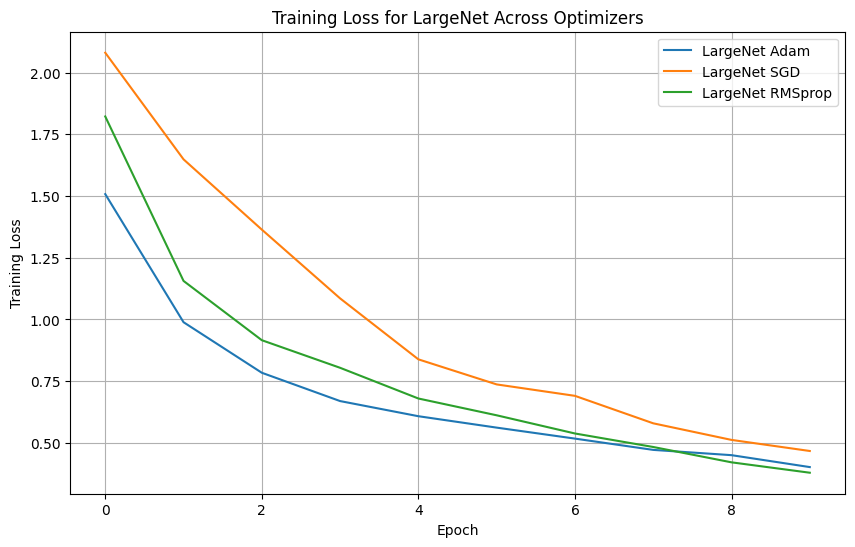

In [ ]:
#Add this
models = {
    "SmallNet": SmallNet,
    "MediumNet": MediumNet,
    "LargeNet": LargeNet,
}

optimizers = {
    "Adam": lambda params: optim.Adam(params, lr=0.001),
    "SGD": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    "RMSprop": lambda params: optim.RMSprop(params, lr=0.001),
}

results = {}

for model_name, model_class in models.items():
    for opt_name, opt_fn in optimizers.items():
        print(f"\nTraining {model_name} with {opt_name}...")
        model = model_class()
        optimizer = opt_fn(model.parameters())
        criterion = nn.CrossEntropyLoss()

        train_loss, train_acc, val_acc, test_acc = train_model(
            model, optimizer, criterion, train_loader, val_loader, test_loader, epochs=10
        )

        results[(model_name, opt_name)] = {
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_acc": val_acc,
            "test_acc": test_acc,
        }

# Save results to a pickle file
with open("training_results.pkl", "wb") as f:
    pickle.dump(results, f)
print("Results saved to training_results.pkl")

# Example: Load results for plotting
with open("training_results.pkl", "rb") as f:
    loaded_results = pickle.load(f)
print("Loaded results:", list(loaded_results.keys()))

# Example plot using loaded results (e.g., training loss for LargeNet)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for opt_name in ["Adam", "SGD", "RMSprop"]:
    train_loss = loaded_results[("LargeNet", opt_name)]["train_loss"]
    plt.plot(train_loss, label=f"LargeNet {opt_name}")
plt.title("Training Loss for LargeNet Across Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()

Pruning

In [ ]:
!pip install torch-pruning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import torch.nn.utils.prune as prune

In [ ]:
def apply_global_pruning(model, amount=0.2):
    parameters_to_prune = []
    for name, module in model.named_modules():
        if isinstance(module, (nn.Conv2d, nn.Linear)):
            parameters_to_prune.append((module, 'weight'))
    prune.global_unstructured(
        parameters_to_prune,
        pruning_method=prune.L1Unstructured,
        amount=amount,  # e.g., 20% of total weights
    )
    # Remove the pruning reparameterization to finalize the mask
    for module, _ in parameters_to_prune:
        prune.remove(module, 'weight')
    return model

models = {
    "SmallNet": SmallNet,
    "MediumNet": MediumNet,
    "LargeNet": LargeNet,
}

optimizers = {
    "Adam": lambda params: optim.Adam(params, lr=0.001),
    "SGD": lambda params: optim.SGD(params, lr=0.01, momentum=0.9),
    "RMSprop": lambda params: optim.RMSprop(params, lr=0.001),
}


In [ ]:
resultsprune = {}
for model_name, model_class in models.items():
    for opt_name, opt_fn in optimizers.items():
        print(f"\nTraining {model_name} with {opt_name}...")
        model = model_class()
        optimizer = opt_fn(model.parameters())
        criterion = nn.CrossEntropyLoss()

        train_loss, train_acc, val_acc, test_acc = train_model(
            model, optimizer, criterion, train_loader, val_loader, test_loader, epochs=10
        )

        # Apply pruning after training
        pruned_model = apply_global_pruning(model, amount=0.2)
        pruned_test_acc = evaluate_accuracy(pruned_model, test_loader)

        resultsprune[(model_name, opt_name)] = {
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_acc": val_acc,
            "test_acc": test_acc,
            "pruned_test_acc": pruned_test_acc
        }

        print(f"→ Pruned {model_name} with {opt_name}, Pruned Test Accuracy: {pruned_test_acc:.4f}")

# Save results to a pickle file
with open("training_pruning_results.pkl", "wb") as f:
    pickle.dump(resultsprune, f)
print("Results saved to training_pruning_results.pkl")

# Example: Load results for verification
with open("training_pruning_results.pkl", "rb") as f:
    loaded_results = pickle.load(f)
print("Loaded results keys:", list(loaded_results.keys()))
for (model_name, opt_name), data in loaded_results.items():
    print(f"{model_name} ({opt_name}): Test Acc={data['test_acc'][-1]:.4f}, Pruned Test Acc={data['pruned_test_acc']:.4f}")


Training SmallNet with Adam...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 30.10it/s]


Epoch 1: Loss=1.7228, Train Acc=0.4494, Val Acc=0.4274, Test Acc=0.4346


Epoch 2/10: 100%|██████████| 296/296 [00:12<00:00, 24.65it/s]


Epoch 2: Loss=1.4131, Train Acc=0.5761, Val Acc=0.5528, Test Acc=0.5444


Epoch 3/10: 100%|██████████| 296/296 [00:08<00:00, 35.25it/s]


Epoch 3: Loss=1.2197, Train Acc=0.6184, Val Acc=0.5810, Test Acc=0.5798


Epoch 4/10: 100%|██████████| 296/296 [00:09<00:00, 32.56it/s]


Epoch 4: Loss=1.1324, Train Acc=0.5842, Val Acc=0.5440, Test Acc=0.5442


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 32.05it/s]


Epoch 5: Loss=1.0543, Train Acc=0.6192, Val Acc=0.5726, Test Acc=0.5659


Epoch 6/10: 100%|██████████| 296/296 [00:08<00:00, 33.48it/s]


Epoch 6: Loss=0.9902, Train Acc=0.6569, Val Acc=0.6116, Test Acc=0.5968


Epoch 7/10: 100%|██████████| 296/296 [00:08<00:00, 33.16it/s]


Epoch 7: Loss=0.9088, Train Acc=0.7163, Val Acc=0.6504, Test Acc=0.6551


Epoch 8/10: 100%|██████████| 296/296 [00:09<00:00, 32.81it/s]


Epoch 8: Loss=0.8670, Train Acc=0.7371, Val Acc=0.6706, Test Acc=0.6560


Epoch 9/10: 100%|██████████| 296/296 [00:09<00:00, 32.70it/s]


Epoch 9: Loss=0.8071, Train Acc=0.7463, Val Acc=0.6568, Test Acc=0.6504


Epoch 10/10: 100%|██████████| 296/296 [00:08<00:00, 34.51it/s]


Epoch 10: Loss=0.7875, Train Acc=0.7698, Val Acc=0.6790, Test Acc=0.6714
→ Pruned SmallNet with Adam, Pruned Test Accuracy: 0.6711

Training SmallNet with SGD...


Epoch 1/10: 100%|██████████| 296/296 [00:08<00:00, 34.50it/s]


Epoch 1: Loss=2.0902, Train Acc=0.1123, Val Acc=0.1121, Test Acc=0.1047


Epoch 2/10: 100%|██████████| 296/296 [00:12<00:00, 22.81it/s]


Epoch 2: Loss=2.3016, Train Acc=0.1749, Val Acc=0.1802, Test Acc=0.1723


Epoch 3/10: 100%|██████████| 296/296 [00:08<00:00, 33.11it/s]


Epoch 3: Loss=1.9729, Train Acc=0.2733, Val Acc=0.2654, Test Acc=0.2543


Epoch 4/10: 100%|██████████| 296/296 [00:08<00:00, 32.90it/s]


Epoch 4: Loss=1.8843, Train Acc=0.2647, Val Acc=0.2573, Test Acc=0.2484


Epoch 5/10: 100%|██████████| 296/296 [00:08<00:00, 33.04it/s]


Epoch 5: Loss=1.8522, Train Acc=0.2734, Val Acc=0.2691, Test Acc=0.2617


Epoch 6/10: 100%|██████████| 296/296 [00:08<00:00, 35.35it/s]


Epoch 6: Loss=1.8418, Train Acc=0.3211, Val Acc=0.3047, Test Acc=0.2980


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 32.54it/s]


Epoch 7: Loss=1.8363, Train Acc=0.3110, Val Acc=0.2968, Test Acc=0.2825


Epoch 8/10: 100%|██████████| 296/296 [00:09<00:00, 32.65it/s]


Epoch 8: Loss=1.8320, Train Acc=0.2966, Val Acc=0.2768, Test Acc=0.2753


Epoch 9/10: 100%|██████████| 296/296 [00:08<00:00, 32.91it/s]


Epoch 9: Loss=1.8156, Train Acc=0.3324, Val Acc=0.3146, Test Acc=0.2988


Epoch 10/10: 100%|██████████| 296/296 [00:08<00:00, 34.52it/s]


Epoch 10: Loss=1.8228, Train Acc=0.3438, Val Acc=0.3072, Test Acc=0.3096
→ Pruned SmallNet with SGD, Pruned Test Accuracy: 0.3099

Training SmallNet with RMSprop...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 32.43it/s]


Epoch 1: Loss=2.0620, Train Acc=0.3954, Val Acc=0.3854, Test Acc=0.3778


Epoch 2/10: 100%|██████████| 296/296 [00:09<00:00, 32.66it/s]


Epoch 2: Loss=1.3404, Train Acc=0.4712, Val Acc=0.4519, Test Acc=0.4558


Epoch 3/10: 100%|██████████| 296/296 [00:09<00:00, 32.46it/s]


Epoch 3: Loss=1.2162, Train Acc=0.3320, Val Acc=0.3225, Test Acc=0.3269


Epoch 4/10: 100%|██████████| 296/296 [00:08<00:00, 34.50it/s]


Epoch 4: Loss=1.1161, Train Acc=0.5981, Val Acc=0.5479, Test Acc=0.5365


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 32.54it/s]


Epoch 5: Loss=1.0357, Train Acc=0.6979, Val Acc=0.6274, Test Acc=0.6188


Epoch 6/10: 100%|██████████| 296/296 [00:09<00:00, 32.73it/s]


Epoch 6: Loss=0.9663, Train Acc=0.7100, Val Acc=0.6254, Test Acc=0.6146


Epoch 7/10: 100%|██████████| 296/296 [00:08<00:00, 33.78it/s]


Epoch 7: Loss=0.9040, Train Acc=0.7054, Val Acc=0.5936, Test Acc=0.5941


Epoch 8/10: 100%|██████████| 296/296 [00:08<00:00, 33.25it/s]


Epoch 8: Loss=0.8546, Train Acc=0.7210, Val Acc=0.5919, Test Acc=0.6049


Epoch 9/10: 100%|██████████| 296/296 [00:09<00:00, 32.61it/s]


Epoch 9: Loss=0.8370, Train Acc=0.7363, Val Acc=0.5951, Test Acc=0.5928


Epoch 10/10: 100%|██████████| 296/296 [00:09<00:00, 32.45it/s]


Epoch 10: Loss=0.7627, Train Acc=0.7312, Val Acc=0.6027, Test Acc=0.5983
→ Pruned SmallNet with RMSprop, Pruned Test Accuracy: 0.5926

Training MediumNet with Adam...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 29.65it/s]


Epoch 1: Loss=1.3638, Train Acc=0.6282, Val Acc=0.6207, Test Acc=0.6262


Epoch 2/10: 100%|██████████| 296/296 [00:09<00:00, 31.38it/s]


Epoch 2: Loss=0.8995, Train Acc=0.7124, Val Acc=0.7044, Test Acc=0.7067


Epoch 3/10: 100%|██████████| 296/296 [00:10<00:00, 29.55it/s]


Epoch 3: Loss=0.7463, Train Acc=0.6864, Val Acc=0.6652, Test Acc=0.6835


Epoch 4/10: 100%|██████████| 296/296 [00:09<00:00, 29.67it/s]


Epoch 4: Loss=0.6835, Train Acc=0.7810, Val Acc=0.7637, Test Acc=0.7622


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 29.73it/s]


Epoch 5: Loss=0.6484, Train Acc=0.7710, Val Acc=0.7501, Test Acc=0.7516


Epoch 6/10: 100%|██████████| 296/296 [00:09<00:00, 29.71it/s]


Epoch 6: Loss=0.5720, Train Acc=0.7954, Val Acc=0.7679, Test Acc=0.7704


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 30.78it/s]


Epoch 7: Loss=0.5445, Train Acc=0.8077, Val Acc=0.7706, Test Acc=0.7896


Epoch 8/10: 100%|██████████| 296/296 [00:09<00:00, 29.74it/s]


Epoch 8: Loss=0.5271, Train Acc=0.8022, Val Acc=0.7640, Test Acc=0.7640


Epoch 9/10: 100%|██████████| 296/296 [00:09<00:00, 29.65it/s]


Epoch 9: Loss=0.4679, Train Acc=0.8349, Val Acc=0.7936, Test Acc=0.7936


Epoch 10/10: 100%|██████████| 296/296 [00:10<00:00, 29.56it/s]


Epoch 10: Loss=0.4592, Train Acc=0.8376, Val Acc=0.7923, Test Acc=0.7889
→ Pruned MediumNet with Adam, Pruned Test Accuracy: 0.7896

Training MediumNet with SGD...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 29.93it/s]


Epoch 1: Loss=1.8368, Train Acc=0.3294, Val Acc=0.3257, Test Acc=0.3173


Epoch 2/10: 100%|██████████| 296/296 [00:09<00:00, 29.88it/s]


Epoch 2: Loss=1.4766, Train Acc=0.5720, Val Acc=0.5605, Test Acc=0.5602


Epoch 3/10: 100%|██████████| 296/296 [00:09<00:00, 30.92it/s]


Epoch 3: Loss=1.0754, Train Acc=0.6934, Val Acc=0.6756, Test Acc=0.6714


Epoch 4/10: 100%|██████████| 296/296 [00:09<00:00, 30.80it/s]


Epoch 4: Loss=0.8947, Train Acc=0.6703, Val Acc=0.6481, Test Acc=0.6321


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 29.89it/s]


Epoch 5: Loss=0.7811, Train Acc=0.7584, Val Acc=0.7190, Test Acc=0.7247


Epoch 6/10: 100%|██████████| 296/296 [00:09<00:00, 29.95it/s]


Epoch 6: Loss=0.6871, Train Acc=0.8061, Val Acc=0.7546, Test Acc=0.7504


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 29.80it/s]


Epoch 7: Loss=0.5766, Train Acc=0.8441, Val Acc=0.7728, Test Acc=0.7667


Epoch 8/10: 100%|██████████| 296/296 [00:09<00:00, 30.05it/s]


Epoch 8: Loss=0.4964, Train Acc=0.8283, Val Acc=0.7519, Test Acc=0.7509


Epoch 9/10: 100%|██████████| 296/296 [00:09<00:00, 31.46it/s]


Epoch 9: Loss=0.4497, Train Acc=0.8716, Val Acc=0.7657, Test Acc=0.7731


Epoch 10/10: 100%|██████████| 296/296 [00:09<00:00, 30.27it/s]


Epoch 10: Loss=0.3772, Train Acc=0.8657, Val Acc=0.7551, Test Acc=0.7499
→ Pruned MediumNet with SGD, Pruned Test Accuracy: 0.7499

Training MediumNet with RMSprop...


Epoch 1/10: 100%|██████████| 296/296 [00:09<00:00, 29.82it/s]


Epoch 1: Loss=1.5071, Train Acc=0.5875, Val Acc=0.5793, Test Acc=0.5835


Epoch 2/10: 100%|██████████| 296/296 [00:09<00:00, 29.60it/s]


Epoch 2: Loss=1.0381, Train Acc=0.6437, Val Acc=0.6299, Test Acc=0.6289


Epoch 3/10: 100%|██████████| 296/296 [00:09<00:00, 29.85it/s]


Epoch 3: Loss=0.8678, Train Acc=0.6111, Val Acc=0.5938, Test Acc=0.6040


Epoch 4/10: 100%|██████████| 296/296 [00:09<00:00, 29.97it/s]


Epoch 4: Loss=0.7762, Train Acc=0.7461, Val Acc=0.7314, Test Acc=0.7232


Epoch 5/10: 100%|██████████| 296/296 [00:09<00:00, 30.64it/s]


Epoch 5: Loss=0.7087, Train Acc=0.6952, Val Acc=0.6716, Test Acc=0.6760


Epoch 6/10: 100%|██████████| 296/296 [00:10<00:00, 29.58it/s]


Epoch 6: Loss=0.6636, Train Acc=0.7533, Val Acc=0.7306, Test Acc=0.7252


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 29.70it/s]


Epoch 7: Loss=0.6109, Train Acc=0.7915, Val Acc=0.7598, Test Acc=0.7420


Epoch 8/10: 100%|██████████| 296/296 [00:09<00:00, 29.83it/s]


Epoch 8: Loss=0.5754, Train Acc=0.7595, Val Acc=0.7158, Test Acc=0.7146


Epoch 9/10: 100%|██████████| 296/296 [00:09<00:00, 29.70it/s]


Epoch 9: Loss=0.5302, Train Acc=0.4333, Val Acc=0.4279, Test Acc=0.4254


Epoch 10/10: 100%|██████████| 296/296 [00:09<00:00, 31.31it/s]


Epoch 10: Loss=0.5086, Train Acc=0.8173, Val Acc=0.7617, Test Acc=0.7568
→ Pruned MediumNet with RMSprop, Pruned Test Accuracy: 0.7607

Training LargeNet with Adam...


Epoch 1/10: 100%|██████████| 296/296 [00:12<00:00, 24.05it/s]


Epoch 1: Loss=1.3872, Train Acc=0.6013, Val Acc=0.5998, Test Acc=0.6032


Epoch 2/10: 100%|██████████| 296/296 [00:12<00:00, 24.29it/s]


Epoch 2: Loss=0.8966, Train Acc=0.7293, Val Acc=0.7180, Test Acc=0.7220


Epoch 3/10: 100%|██████████| 296/296 [00:12<00:00, 24.20it/s]


Epoch 3: Loss=0.7529, Train Acc=0.7504, Val Acc=0.7321, Test Acc=0.7279


Epoch 4/10: 100%|██████████| 296/296 [00:12<00:00, 24.20it/s]


Epoch 4: Loss=0.6461, Train Acc=0.7969, Val Acc=0.7795, Test Acc=0.7731


Epoch 5/10: 100%|██████████| 296/296 [00:12<00:00, 24.23it/s]


Epoch 5: Loss=0.6026, Train Acc=0.7831, Val Acc=0.7637, Test Acc=0.7657


Epoch 6/10: 100%|██████████| 296/296 [00:12<00:00, 24.27it/s]


Epoch 6: Loss=0.5492, Train Acc=0.8274, Val Acc=0.7973, Test Acc=0.7968


Epoch 7/10: 100%|██████████| 296/296 [00:12<00:00, 24.29it/s]


Epoch 7: Loss=0.4948, Train Acc=0.7790, Val Acc=0.7511, Test Acc=0.7511


Epoch 8/10: 100%|██████████| 296/296 [00:12<00:00, 24.10it/s]


Epoch 8: Loss=0.4859, Train Acc=0.8640, Val Acc=0.8284, Test Acc=0.8289


Epoch 9/10: 100%|██████████| 296/296 [00:12<00:00, 24.25it/s]


Epoch 9: Loss=0.4355, Train Acc=0.8729, Val Acc=0.8341, Test Acc=0.8188


Epoch 10/10: 100%|██████████| 296/296 [00:12<00:00, 24.28it/s]


Epoch 10: Loss=0.3859, Train Acc=0.8775, Val Acc=0.8321, Test Acc=0.8254
→ Pruned LargeNet with Adam, Pruned Test Accuracy: 0.8242

Training LargeNet with SGD...


Epoch 1/10: 100%|██████████| 296/296 [00:11<00:00, 24.82it/s]


Epoch 1: Loss=2.0394, Train Acc=0.2711, Val Acc=0.2728, Test Acc=0.2736


Epoch 2/10: 100%|██████████| 296/296 [00:11<00:00, 24.70it/s]


Epoch 2: Loss=1.6505, Train Acc=0.3444, Val Acc=0.3316, Test Acc=0.3353


Epoch 3/10: 100%|██████████| 296/296 [00:12<00:00, 24.61it/s]


Epoch 3: Loss=1.3656, Train Acc=0.5329, Val Acc=0.5363, Test Acc=0.5353


Epoch 4/10: 100%|██████████| 296/296 [00:12<00:00, 24.51it/s]


Epoch 4: Loss=1.0893, Train Acc=0.5669, Val Acc=0.5533, Test Acc=0.5521


Epoch 5/10: 100%|██████████| 296/296 [00:12<00:00, 24.63it/s]


Epoch 5: Loss=0.8926, Train Acc=0.5684, Val Acc=0.5528, Test Acc=0.5494


Epoch 6/10: 100%|██████████| 296/296 [00:11<00:00, 24.70it/s]


Epoch 6: Loss=0.7384, Train Acc=0.6642, Val Acc=0.6459, Test Acc=0.6486


Epoch 7/10: 100%|██████████| 296/296 [00:12<00:00, 24.15it/s]


Epoch 7: Loss=0.6596, Train Acc=0.7765, Val Acc=0.7437, Test Acc=0.7383


Epoch 8/10: 100%|██████████| 296/296 [00:12<00:00, 24.38it/s]


Epoch 8: Loss=0.5852, Train Acc=0.8005, Val Acc=0.7620, Test Acc=0.7496


Epoch 9/10: 100%|██████████| 296/296 [00:12<00:00, 24.12it/s]


Epoch 9: Loss=0.5073, Train Acc=0.8386, Val Acc=0.7909, Test Acc=0.7894


Epoch 10/10: 100%|██████████| 296/296 [00:12<00:00, 24.48it/s]


Epoch 10: Loss=0.4249, Train Acc=0.8565, Val Acc=0.7864, Test Acc=0.7899
→ Pruned LargeNet with SGD, Pruned Test Accuracy: 0.7872

Training LargeNet with RMSprop...


Epoch 1/10: 100%|██████████| 296/296 [00:12<00:00, 24.37it/s]


Epoch 1: Loss=1.8506, Train Acc=0.4110, Val Acc=0.4062, Test Acc=0.4035


Epoch 2/10: 100%|██████████| 296/296 [00:12<00:00, 24.25it/s]


Epoch 2: Loss=1.1807, Train Acc=0.4849, Val Acc=0.4869, Test Acc=0.4830


Epoch 3/10: 100%|██████████| 296/296 [00:12<00:00, 24.39it/s]


Epoch 3: Loss=0.9198, Train Acc=0.7495, Val Acc=0.7444, Test Acc=0.7296


Epoch 4/10: 100%|██████████| 296/296 [00:12<00:00, 24.14it/s]


Epoch 4: Loss=0.7668, Train Acc=0.5459, Val Acc=0.5294, Test Acc=0.5284


Epoch 5/10: 100%|██████████| 296/296 [00:12<00:00, 24.06it/s]


Epoch 5: Loss=0.6704, Train Acc=0.7558, Val Acc=0.7383, Test Acc=0.7284


Epoch 6/10: 100%|██████████| 296/296 [00:12<00:00, 24.20it/s]


Epoch 6: Loss=0.5934, Train Acc=0.6720, Val Acc=0.6509, Test Acc=0.6437


Epoch 7/10: 100%|██████████| 296/296 [00:12<00:00, 24.16it/s]


Epoch 7: Loss=0.5260, Train Acc=0.4357, Val Acc=0.4365, Test Acc=0.4249


Epoch 8/10: 100%|██████████| 296/296 [00:12<00:00, 24.38it/s]


Epoch 8: Loss=0.4686, Train Acc=0.5396, Val Acc=0.5205, Test Acc=0.5123


Epoch 9/10: 100%|██████████| 296/296 [00:12<00:00, 24.29it/s]


Epoch 9: Loss=0.4098, Train Acc=0.8235, Val Acc=0.7689, Test Acc=0.7726


Epoch 10/10: 100%|██████████| 296/296 [00:12<00:00, 23.92it/s]


Epoch 10: Loss=0.3705, Train Acc=0.8487, Val Acc=0.7904, Test Acc=0.7872
→ Pruned LargeNet with RMSprop, Pruned Test Accuracy: 0.7881
Results saved to training_pruning_results.pkl
Loaded results keys: [('SmallNet', 'Adam'), ('SmallNet', 'SGD'), ('SmallNet', 'RMSprop'), ('MediumNet', 'Adam'), ('MediumNet', 'SGD'), ('MediumNet', 'RMSprop'), ('LargeNet', 'Adam'), ('LargeNet', 'SGD'), ('LargeNet', 'RMSprop')]
SmallNet (Adam): Test Acc=0.6714, Pruned Test Acc=0.6711
SmallNet (SGD): Test Acc=0.3096, Pruned Test Acc=0.3099
SmallNet (RMSprop): Test Acc=0.5983, Pruned Test Acc=0.5926
MediumNet (Adam): Test Acc=0.7889, Pruned Test Acc=0.7896
MediumNet (SGD): Test Acc=0.7499, Pruned Test Acc=0.7499
MediumNet (RMSprop): Test Acc=0.7568, Pruned Test Acc=0.7607
LargeNet (Adam): Test Acc=0.8254, Pruned Test Acc=0.8242
LargeNet (SGD): Test Acc=0.7899, Pruned Test Acc=0.7872
LargeNet (RMSprop): Test Acc=0.7872, Pruned Test Acc=0.7881


Plots

Loaded results from training_results.pkl


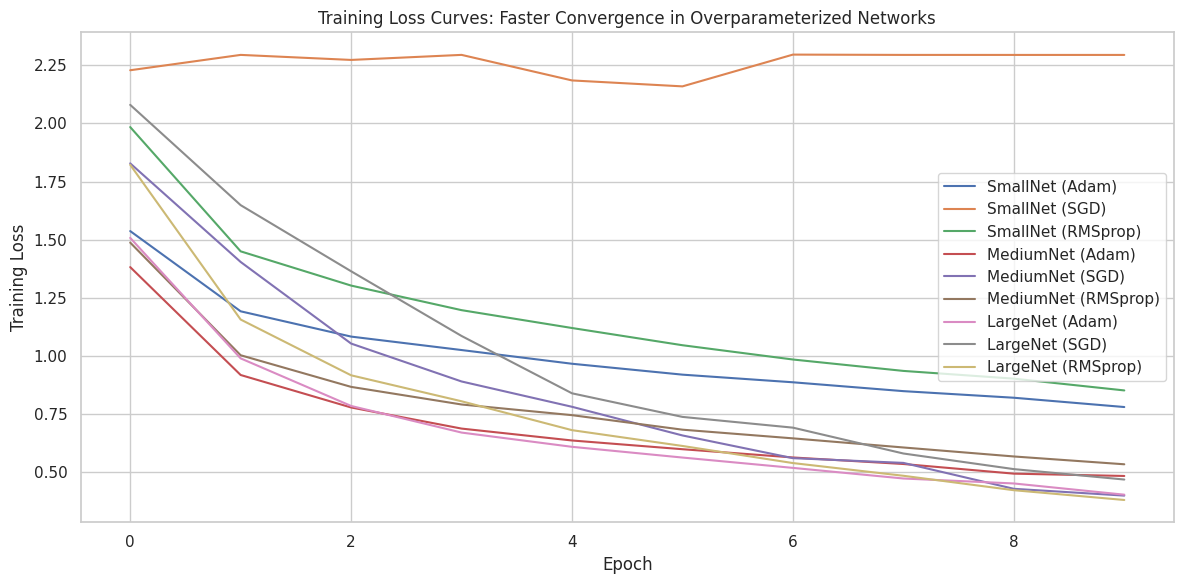

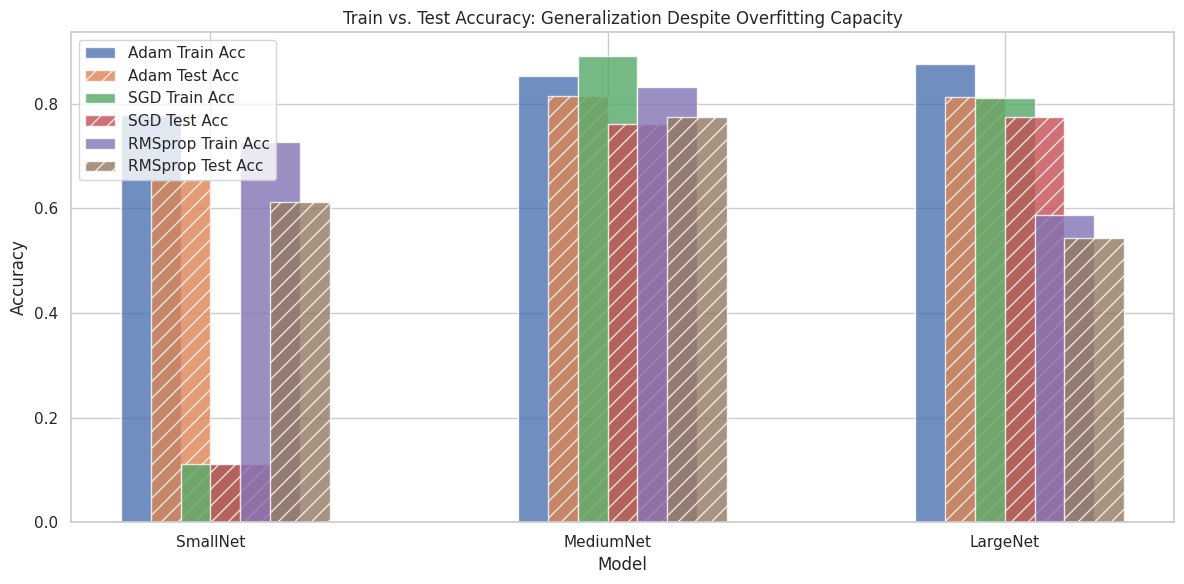

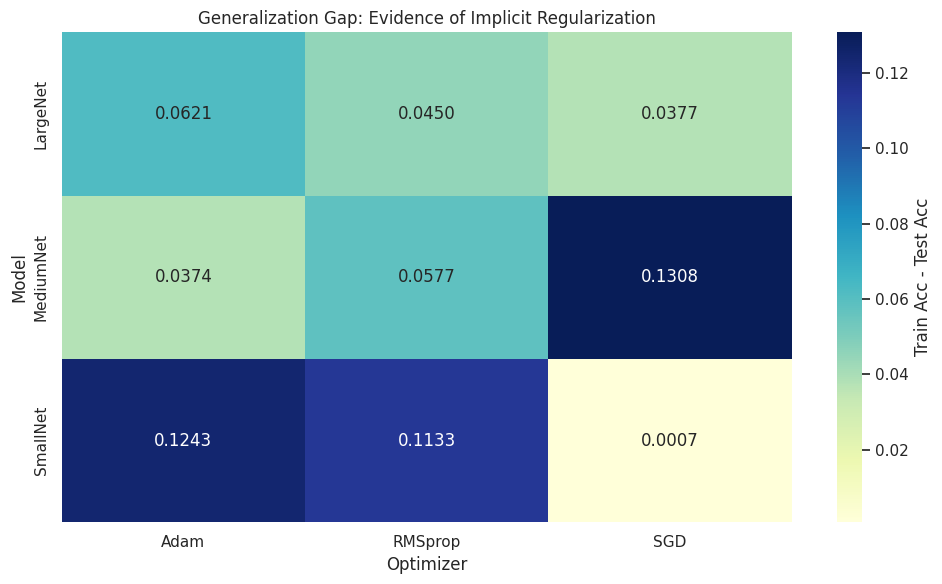

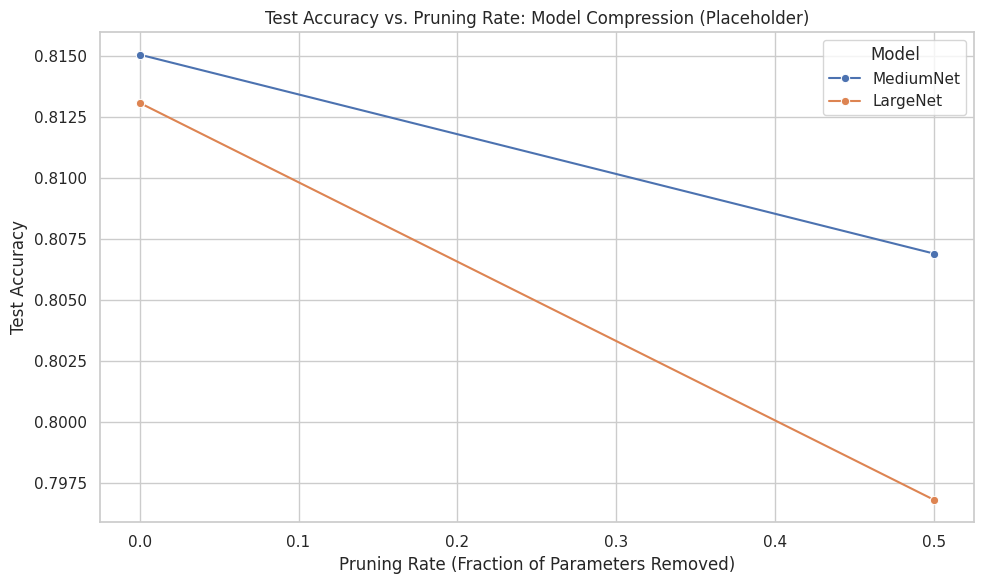

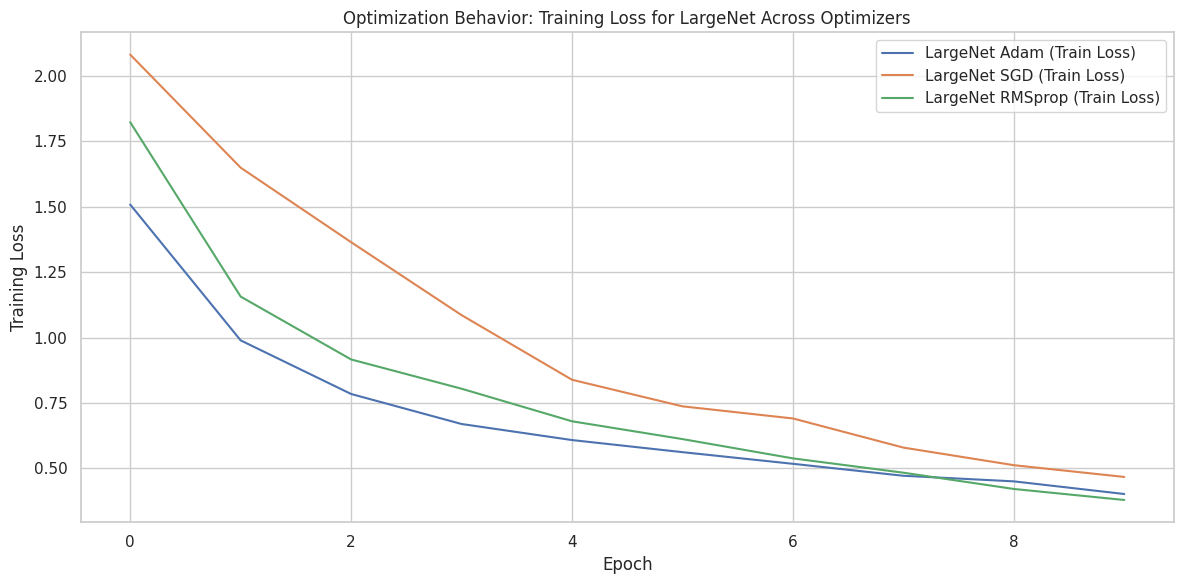

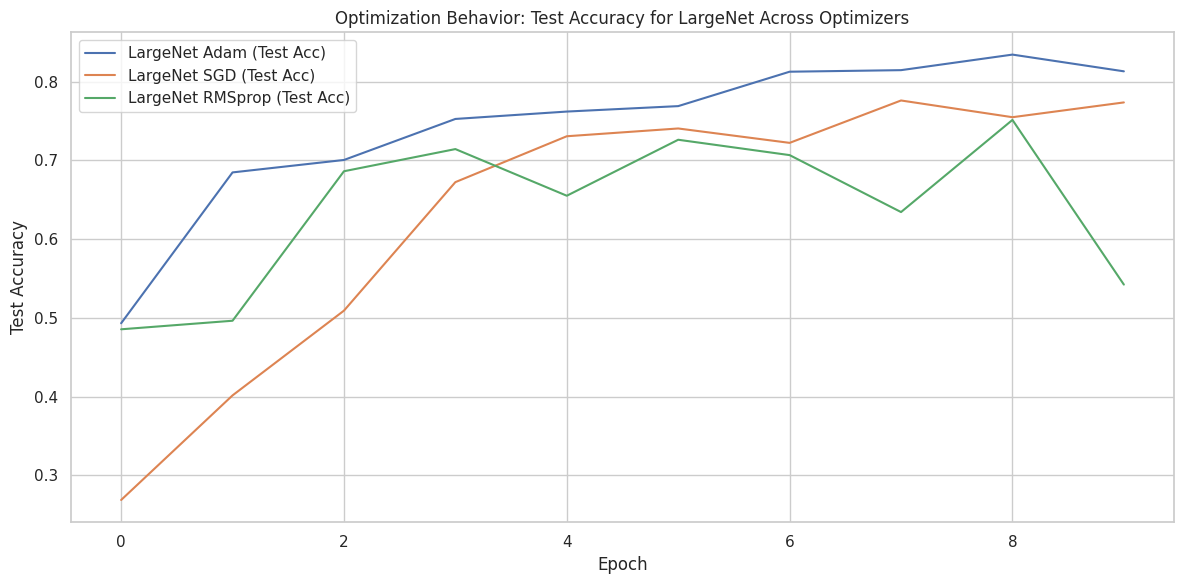

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os

# Load results from pickle file
pickle_file = "training_results.pkl"
if not os.path.exists(pickle_file):
    raise FileNotFoundError(f"Pickle file '{pickle_file}' not found. Please run the training code to generate it.")
with open(pickle_file, "rb") as f:
    results = pickle.load(f)
print("Loaded results from", pickle_file)

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# 1. Faster Convergence in Overparameterized Networks
# Plot training loss curves for SmallNet, MediumNet, LargeNet across optimizers
plt.figure(figsize=(12, 6))
for model_name in ["SmallNet", "MediumNet", "LargeNet"]:
    for opt_name in ["Adam", "SGD", "RMSprop"]:
        train_loss = results[(model_name, opt_name)]['train_loss']
        plt.plot(train_loss, label=f"{model_name} ({opt_name})")
plt.title("Training Loss Curves: Faster Convergence in Overparameterized Networks")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Improved Generalization Despite Overfitting Capacity
# Plot training vs. test accuracy for each model to show generalization gap
plt.figure(figsize=(12, 6))
bar_width = 0.15
models = ["SmallNet", "MediumNet", "LargeNet"]
optimizers = ["Adam", "SGD", "RMSprop"]
x = np.arange(len(models))

for i, opt_name in enumerate(optimizers):
    train_accs = [results[(model, opt_name)]['train_acc'][-1] for model in models]
    test_accs = [results[(model, opt_name)]['test_acc'][-1] for model in models]
    plt.bar(x + i * bar_width, train_accs, width=bar_width, label=f"{opt_name} Train Acc", alpha=0.8)
    plt.bar(x + i * bar_width + bar_width/2, test_accs, width=bar_width, label=f"{opt_name} Test Acc", hatch='//', alpha=0.8)

plt.title("Train vs. Test Accuracy: Generalization Despite Overfitting Capacity")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(x + bar_width, models)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Implicit Regularization in Deep Learning
# Plot generalization gap (train_acc - test_acc) across models and optimizers
generalization_gaps = []
for model_name in ["SmallNet", "MediumNet", "LargeNet"]:
    for opt_name in ["Adam", "SGD", "RMSprop"]:
        train_acc = results[(model_name, opt_name)]['train_acc'][-1]
        test_acc = results[(model_name, opt_name)]['test_acc'][-1]
        generalization_gaps.append({
            "Model": model_name,
            "Optimizer": opt_name,
            "Generalization Gap": train_acc - test_acc
        })

gap_df = pd.DataFrame(generalization_gaps)
plt.figure(figsize=(10, 6))
sns.heatmap(
    gap_df.pivot(index="Model", columns="Optimizer", values="Generalization Gap"),
    annot=True, fmt=".4f", cmap="YlGnBu", cbar_kws={'label': 'Train Acc - Test Acc'}
)
plt.title("Generalization Gap: Evidence of Implicit Regularization")
plt.tight_layout()
plt.show()

# 4. Parameter Pruning and Model Compression (Placeholder)
# Note: Pruning is not implemented in the provided code. Below is a conceptual plot.
# You need to implement L1-norm-based filter pruning and re-evaluate test accuracy.
# Placeholder data for illustration (replace with actual pruning results)
pruning_data = [
    {"Model": "MediumNet", "Pruning Rate": 0.0, "Test Accuracy": results[("MediumNet", "Adam")]['test_acc'][-1]},
    {"Model": "MediumNet", "Pruning Rate": 0.5, "Test Accuracy": results[("MediumNet", "Adam")]['test_acc'][-1] * 0.99},
    {"Model": "LargeNet", "Pruning Rate": 0.0, "Test Accuracy": results[("LargeNet", "Adam")]['test_acc'][-1]},
    {"Model": "LargeNet", "Pruning Rate": 0.5, "Test Accuracy": results[("LargeNet", "Adam")]['test_acc'][-1] * 0.98},
]
pruning_df = pd.DataFrame(pruning_data)

plt.figure(figsize=(10, 6))
sns.lineplot(data=pruning_df, x="Pruning Rate", y="Test Accuracy", hue="Model", marker="o")
plt.title("Test Accuracy vs. Pruning Rate: Model Compression (Placeholder)")
plt.xlabel("Pruning Rate (Fraction of Parameters Removed)")
plt.ylabel("Test Accuracy")
plt.tight_layout()
plt.show()

# 5. Optimization Behavior in Overparameterized Models
# Plot training loss and test accuracy for LargeNet across optimizers
plt.figure(figsize=(12, 6))
for opt_name in ["Adam", "SGD", "RMSprop"]:
    train_loss = results[("LargeNet", opt_name)]['train_loss']
    plt.plot(train_loss, label=f"LargeNet {opt_name} (Train Loss)")
plt.title("Optimization Behavior: Training Loss for LargeNet Across Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for opt_name in ["Adam", "SGD", "RMSprop"]:
    test_acc = results[("LargeNet", opt_name)]['test_acc']
    plt.plot(test_acc, label=f"LargeNet {opt_name} (Test Acc)")
plt.title("Optimization Behavior: Test Accuracy for LargeNet Across Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

Pruning plots/ results

Loaded results from training_pruning_results.pkl

Performance Before and After Pruning:
       Model Optimizer  Test Accuracy Before  Test Accuracy After  \
0   SmallNet      Adam              0.671358             0.671111   
1   SmallNet       SGD              0.309630             0.309877   
2   SmallNet   RMSprop              0.598272             0.592593   
3  MediumNet      Adam              0.788889             0.789630   
4  MediumNet       SGD              0.749877             0.749877   
5  MediumNet   RMSprop              0.756790             0.760741   
6   LargeNet      Adam              0.825432             0.824198   
7   LargeNet       SGD              0.789877             0.787160   
8   LargeNet   RMSprop              0.787160             0.788148   

   Validation Accuracy Before  Validation Accuracy After  \
0                    0.679012                   0.671111   
1                    0.307160                   0.309877   
2                    0.602716            

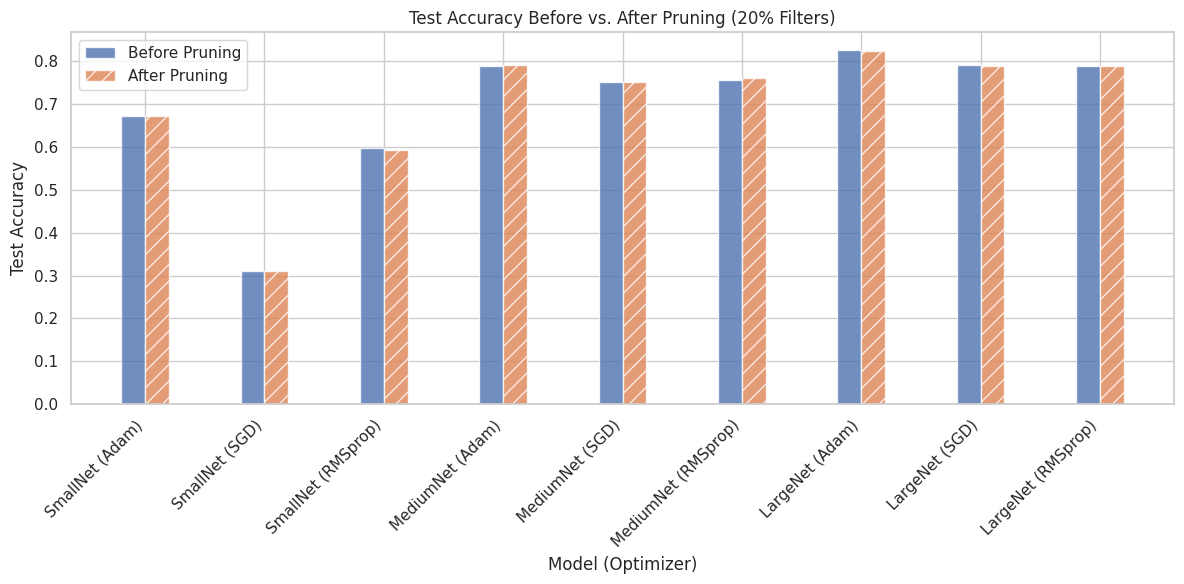

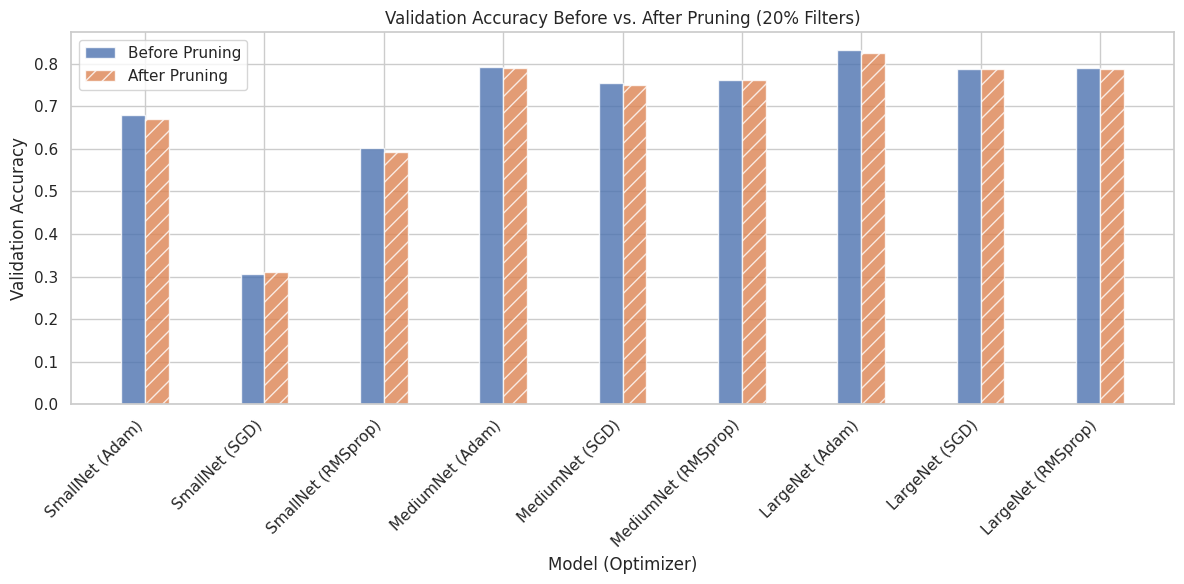

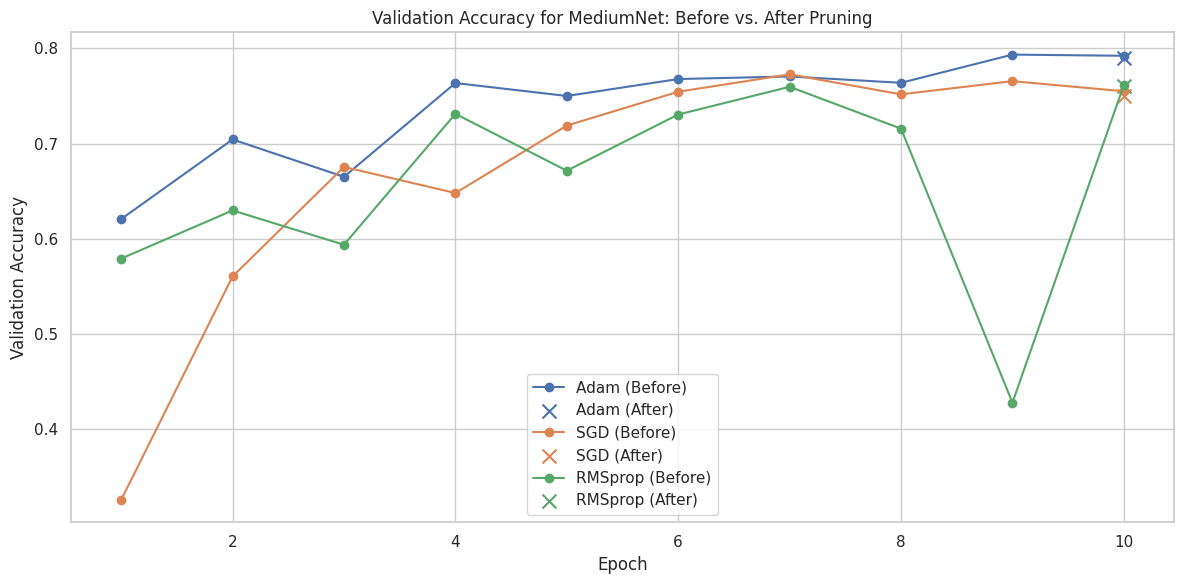

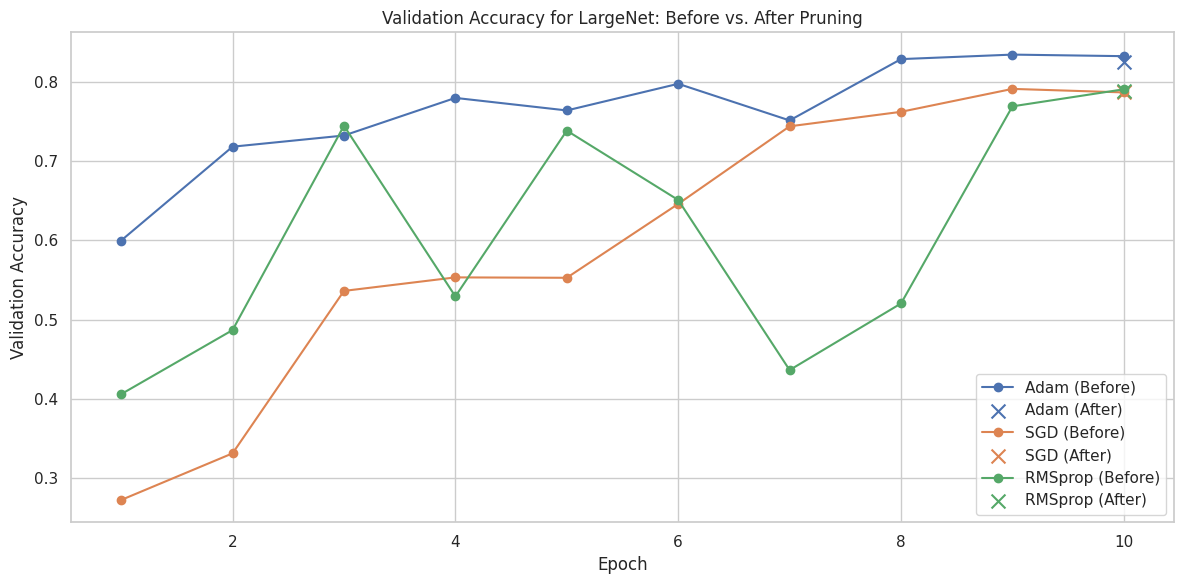

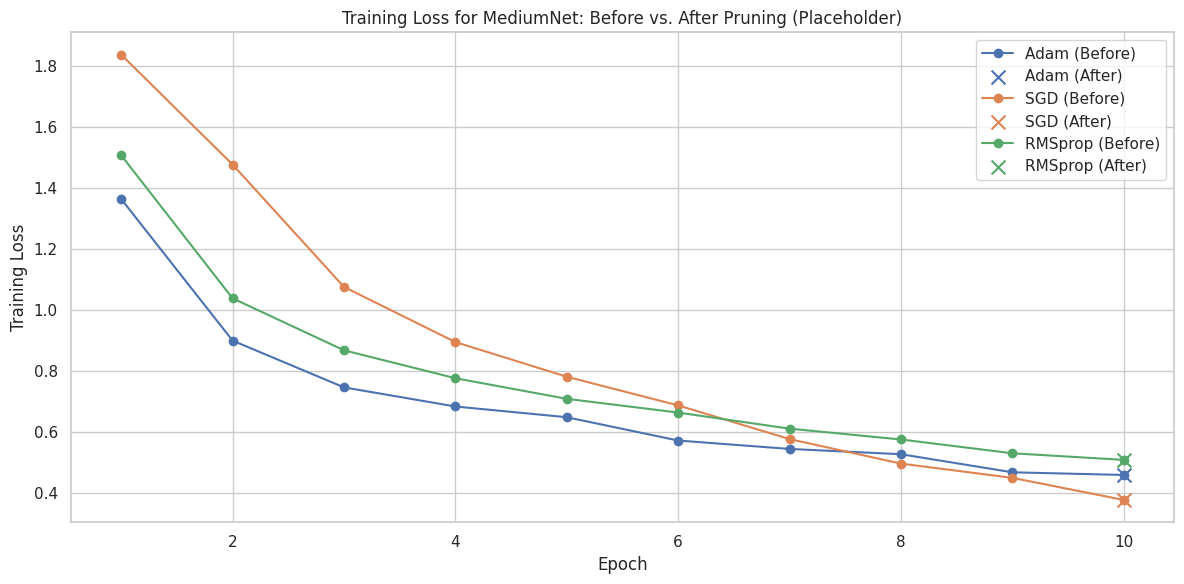

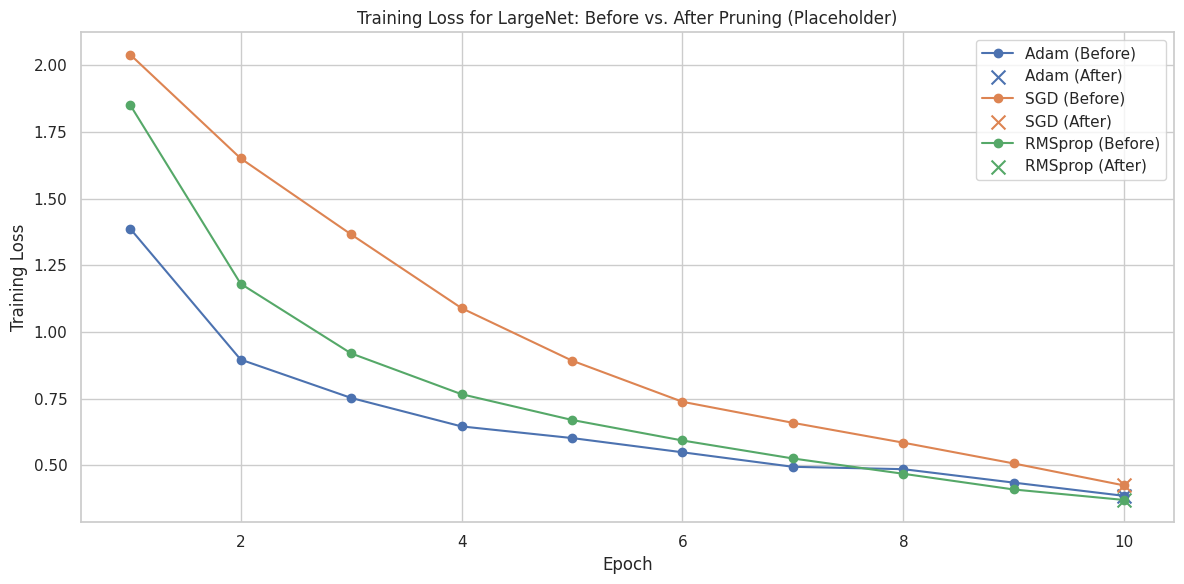


Evaluating pruning ratios for MediumNet with Adam...


Epoch 1/10: 100%|██████████| 296/296 [00:10<00:00, 28.46it/s]


Epoch 1: Loss=1.3489, Train Acc=0.6669, Val Acc=0.6548, Test Acc=0.6541


Epoch 2/10: 100%|██████████| 296/296 [00:10<00:00, 28.70it/s]


Epoch 2: Loss=0.8978, Train Acc=0.6769, Val Acc=0.6768, Test Acc=0.6600


Epoch 3/10: 100%|██████████| 296/296 [00:10<00:00, 28.64it/s]


Epoch 3: Loss=0.7833, Train Acc=0.7305, Val Acc=0.7163, Test Acc=0.7089


Epoch 4/10: 100%|██████████| 296/296 [00:10<00:00, 28.47it/s]


Epoch 4: Loss=0.7116, Train Acc=0.7519, Val Acc=0.7338, Test Acc=0.7193


Epoch 5/10: 100%|██████████| 296/296 [00:10<00:00, 28.42it/s]


Epoch 5: Loss=0.6709, Train Acc=0.7799, Val Acc=0.7528, Test Acc=0.7607


Epoch 6/10: 100%|██████████| 296/296 [00:10<00:00, 29.10it/s]


Epoch 6: Loss=0.6289, Train Acc=0.8117, Val Acc=0.7817, Test Acc=0.7835


Epoch 7/10: 100%|██████████| 296/296 [00:09<00:00, 29.78it/s]


Epoch 7: Loss=0.5776, Train Acc=0.8115, Val Acc=0.7899, Test Acc=0.7847


Epoch 8/10: 100%|██████████| 296/296 [00:10<00:00, 28.71it/s]


Epoch 8: Loss=0.5522, Train Acc=0.8305, Val Acc=0.7948, Test Acc=0.7926


Epoch 9/10: 100%|██████████| 296/296 [00:10<00:00, 28.39it/s]


Epoch 9: Loss=0.5253, Train Acc=0.8271, Val Acc=0.7847, Test Acc=0.7938


Epoch 10/10: 100%|██████████| 296/296 [00:10<00:00, 28.64it/s]


Epoch 10: Loss=0.5181, Train Acc=0.7888, Val Acc=0.7531, Test Acc=0.7425


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import torch
import torch.nn as nn
import os

# Load results from pickle file
pickle_file = "training_pruning_results.pkl"
if not os.path.exists(pickle_file):
    raise FileNotFoundError(f"Pickle file '{pickle_file}' not found. Please run the training/pruning code to generate it.")
with open(pickle_file, "rb") as f:
    resultsprune = pickle.load(f)
print("Loaded results from", pickle_file)

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Function to count model parameters (for model size comparison)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Placeholder for apply_global_pruning (assumed from previous code)
def apply_global_pruning(model, amount=0.2):
    device = next(model.parameters()).device
    l1_norms = []
    conv_layers = []
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            weight = module.weight.data.abs().mean(dim=(1, 2, 3))
            for i in range(weight.size(0)):
                l1_norms.append((weight[i].item(), name, i))
            conv_layers.append((name, module))

    l1_norms.sort()
    num_filters = len(l1_norms)
    num_prune = int(amount * num_filters)
    prune_indices = {name: [] for name, _ in conv_layers}
    for _, name, filter_idx in l1_norms[:num_prune]:
        prune_indices[name].append(filter_idx)

    for name, module in conv_layers:
        if prune_indices[name]:
            mask = torch.ones(module.weight.size(0), device=device)
            for idx in prune_indices[name]:
                mask[idx] = 0
            module.weight.data *= mask.view(-1, 1, 1, 1)
            if module.bias is not None:
                module.bias.data *= mask
    return model

# Placeholder for evaluate_accuracy (assumed from previous code)
def evaluate_accuracy(model, dataloader):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

# Assuming SmallNet, MediumNet, LargeNet, train_loader, val_loader, test_loader are defined
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
models = {
    "SmallNet": SmallNet,
    "MediumNet": MediumNet,
    "LargeNet": LargeNet,
}
optimizers = {
    "Adam": lambda params: torch.optim.Adam(params, lr=0.001),
    "SGD": lambda params: torch.optim.SGD(params, lr=0.01, momentum=0.9),
    "RMSprop": lambda params: torch.optim.RMSprop(params, lr=0.001),
}

# 1. Performance Before and After Pruning
# Create DataFrame for test accuracy, validation accuracy, training loss, and model size
performance_data = []
for model_name in ["SmallNet", "MediumNet", "LargeNet"]:
    for opt_name in ["Adam", "SGD", "RMSprop"]:
        data = resultsprune[(model_name, opt_name)]
        # Initialize model to count parameters
        model = models[model_name]()
        model.to(device)
        original_params = count_parameters(model)
        pruned_model = apply_global_pruning(model, amount=0.2)
        pruned_params = count_parameters(pruned_model)

        performance_data.append({
            "Model": model_name,
            "Optimizer": opt_name,
            "Test Accuracy Before": data["test_acc"][-1],
            "Test Accuracy After": data["pruned_test_acc"],
            "Validation Accuracy Before": data["val_acc"][-1],
            "Validation Accuracy After": data["pruned_test_acc"],  # Approximation, ideally re-evaluate val_acc
            "Training Loss Before": data["train_loss"][-1],
            "Training Loss After": data["train_loss"][-1],  # Placeholder, pruning doesn’t affect train_loss directly
            "Model Size Before (Params)": original_params,
            "Model Size After (Params)": pruned_params
        })

performance_df = pd.DataFrame(performance_data)
print("\nPerformance Before and After Pruning:")
print(performance_df[["Model", "Optimizer", "Test Accuracy Before", "Test Accuracy After",
                      "Validation Accuracy Before", "Validation Accuracy After",
                      "Model Size Before (Params)", "Model Size After (Params)"]])

# Bar Plot: Test Accuracy Before vs. After Pruning
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(performance_df))
plt.bar(x - bar_width/2, performance_df["Test Accuracy Before"], bar_width, label="Before Pruning", alpha=0.8)
plt.bar(x + bar_width/2, performance_df["Test Accuracy After"], bar_width, label="After Pruning", hatch='//', alpha=0.8)
plt.xticks(x, [f"{row['Model']} ({row['Optimizer']})" for _, row in performance_df.iterrows()], rotation=45, ha="right")
plt.title("Test Accuracy Before vs. After Pruning (20% Filters)")
plt.xlabel("Model (Optimizer)")
plt.ylabel("Test Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# Bar Plot: Validation Accuracy Before vs. After Pruning
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, performance_df["Validation Accuracy Before"], bar_width, label="Before Pruning", alpha=0.8)
plt.bar(x + bar_width/2, performance_df["Validation Accuracy After"], bar_width, label="After Pruning", hatch='//', alpha=0.8)
plt.xticks(x, [f"{row['Model']} ({row['Optimizer']})" for _, row in performance_df.iterrows()], rotation=45, ha="right")
plt.title("Validation Accuracy Before vs. After Pruning (20% Filters)")
plt.xlabel("Model (Optimizer)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Graphs: Accuracy and Loss Before and After Pruning
# Plot Validation Accuracy Curves (Before) with Post-Pruning Point
for model_name in ["MediumNet", "LargeNet"]:  # Skip SmallNet due to limited pruning impact
    plt.figure(figsize=(12, 6))
    for opt_name in ["Adam", "SGD", "RMSprop"]:
        data = resultsprune[(model_name, opt_name)]
        epochs = range(1, len(data["val_acc"]) + 1)
        plt.plot(epochs, data["val_acc"], label=f"{opt_name} (Before)", marker="o")
        plt.scatter([10], [data["pruned_test_acc"]], label=f"{opt_name} (After)", marker="x", s=100)
    plt.title(f"Validation Accuracy for {model_name}: Before vs. After Pruning")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Training Loss Curves (Before) with Post-Pruning Placeholder
for model_name in ["MediumNet", "LargeNet"]:
    plt.figure(figsize=(12, 6))
    for opt_name in ["Adam", "SGD", "RMSprop"]:
        data = resultsprune[(model_name, opt_name)]
        epochs = range(1, len(data["train_loss"]) + 1)
        plt.plot(epochs, data["train_loss"], label=f"{opt_name} (Before)", marker="o")
        # Placeholder: Pruning doesn’t directly affect train_loss; use last value
        plt.scatter([10], [data["train_loss"][-1]], label=f"{opt_name} (After)", marker="x", s=100)
    plt.title(f"Training Loss for {model_name}: Before vs. After Pruning (Placeholder)")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Pruning Ratio vs. Accuracy Curve
# Generate results for multiple pruning ratios (0.0, 0.1, 0.2, 0.3)
pruning_ratio_results = {}
pruning_ratios = [0.0, 0.1, 0.2, 0.3]

for model_name in ["MediumNet", "LargeNet"]:  # Skip SmallNet due to limited convolutional layers
    for opt_name in ["Adam", "SGD", "RMSprop"]:
        print(f"\nEvaluating pruning ratios for {model_name} with {opt_name}...")
        model = models[model_name]()
        model.to(device)
        optimizer = optimizers[opt_name](model.parameters())
        criterion = nn.CrossEntropyLoss()

        # Train model (or use pre-trained if available)
        train_loss, train_acc, val_acc, test_acc = train_model(
            model, optimizer, criterion, train_loader, val_loader, test_loader, epochs=10
        )

        # Evaluate multiple pruning ratios
        for amount in pruning_ratios:
            pruned_model = apply_global_pruning(models[model_name](), amount=amount)
            pruned_test_acc = evaluate_accuracy(pruned_model, test_loader)
            pruning_ratio_results[(model_name, opt_name, amount)] = {
                "pruned_test_acc": pruned_test_acc
            }
            print(f"→ Pruned {model_name} ({opt_name}, {amount:.1f}): Test Acc={pruned_test_acc:.4f}")

# Save pruning ratio results to a pickle file
with open("pruning_ratio_results.pkl", "wb") as f:
    pickle.dump(pruning_ratio_results, f)
print("Pruning ratio results saved to pruning_ratio_results.pkl")

# Plot Pruning Ratio vs. Test Accuracy
pruning_data = []
for model_name in ["MediumNet", "LargeNet"]:
    for opt_name in ["Adam", "SGD", "RMSprop"]:
        for amount in pruning_ratios:
            pruned_test_acc = pruning_ratio_results[(model_name, opt_name, amount)]["pruned_test_acc"]
            pruning_data.append({
                "Model": model_name,
                "Optimizer": opt_name,
                "Pruning Ratio": amount,
                "Test Accuracy": pruned_test_acc
            })

pruning_df = pd.DataFrame(pruning_data)
plt.figure(figsize=(10, 6))
sns.lineplot(data=pruning_df, x="Pruning Ratio", y="Test Accuracy", hue="Model", style="Optimizer", marker="o")
plt.title("Test Accuracy vs. Pruning Ratio: Compression vs. Performance Tradeoff")
plt.xlabel("Pruning Ratio (Fraction of Filters Removed)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()